# <font color='#EADCA0'><h2>Data Downloading from Kaggle</font>
After downloading the datasets from Kaggle, the code uses a function to unzip the datasets for further use in the model.
<br>
steps to download kaggle.json





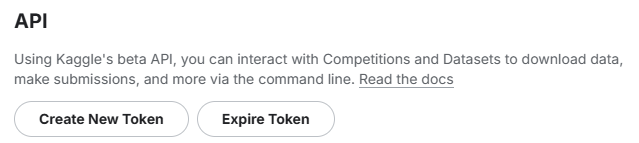

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()  # Upload kaggle.json file

In [ ]:
import os
os.makedirs('/root/.kaggle', exist_ok=True)
!mv kaggle.json /root/.kaggle/

In [ ]:
!kaggle datasets download -d fatmaalzhraahmed/virus-12345

In [ ]:
!unzip virus-12345.zip -d virus

# <font color='#EADCA0'><h2>IMPORT NECESSARY LIBRARIES</font>

In [ ]:
import cv2
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import layers
from tensorflow.keras import Model, Sequential, models
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers, Model
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score, recall_score
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.models import Model
from IPython.display import clear_output
from sklearn.utils import shuffle
from tensorflow.keras import regularizers
from tensorflow.keras.initializers import glorot_uniform
from typing import List

# <font color='#EADCA0'><h2>VISUALIZE IMAGE DATA</font>

<font color='#EADCA1'><h3>COUNT IMAGES IN EACH CLASS</h3></font>

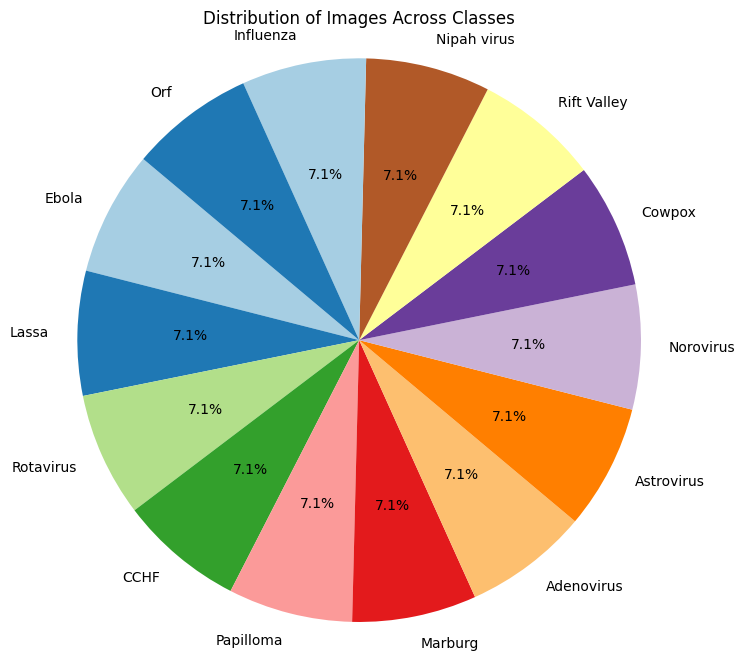

In [ ]:
def count_images_in_classes(input_folder):
    class_image_counts = {}

    for class_folder in os.listdir(input_folder):
        class_path = os.path.join(input_folder, class_folder)

        if os.path.isdir(class_path):
            tif_files = [f for f in os.listdir(class_path) if f.endswith(".tif")]

            class_image_counts[class_folder] = len(tif_files)

    return class_image_counts

# create a pie chart
def plot_pie_chart(image_counts):
    # Prepare data for pie chart
    class_names = list(image_counts.keys())
    image_counts_values = list(image_counts.values())

    plt.figure(figsize=(8, 8))
    plt.pie(image_counts_values, labels=class_names, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    plt.title('Distribution of Images Across Classes')
    plt.axis('equal')
    plt.show()

input_folder = "/content/virus/TEM virus dataset/context_virus_1nm_256x256/augmented_train"

image_counts = count_images_in_classes(input_folder)

plot_pie_chart(image_counts)


<font color='#EADCA0'><h3>COUNT TRAIN IMAGE DATA</h3></font>

In [ ]:
print("Number of images per class:")
for class_name, count in image_counts.items():
    print(f"{class_name}: {count} images")

total_images = sum(image_counts.values())
print(f"\nTotal number of images: {total_images}")

Number of images per class:
Rotavirus: 736 images
Rift Valley: 736 images
Marburg: 736 images
Nipah virus: 736 images
Papilloma: 736 images
Orf: 736 images
Adenovirus: 736 images
Influenza: 736 images
Norovirus: 736 images
CCHF: 736 images
Lassa: 736 images
Astrovirus: 736 images
Cowpox: 736 images
Ebola: 736 images

Total number of images: 10304


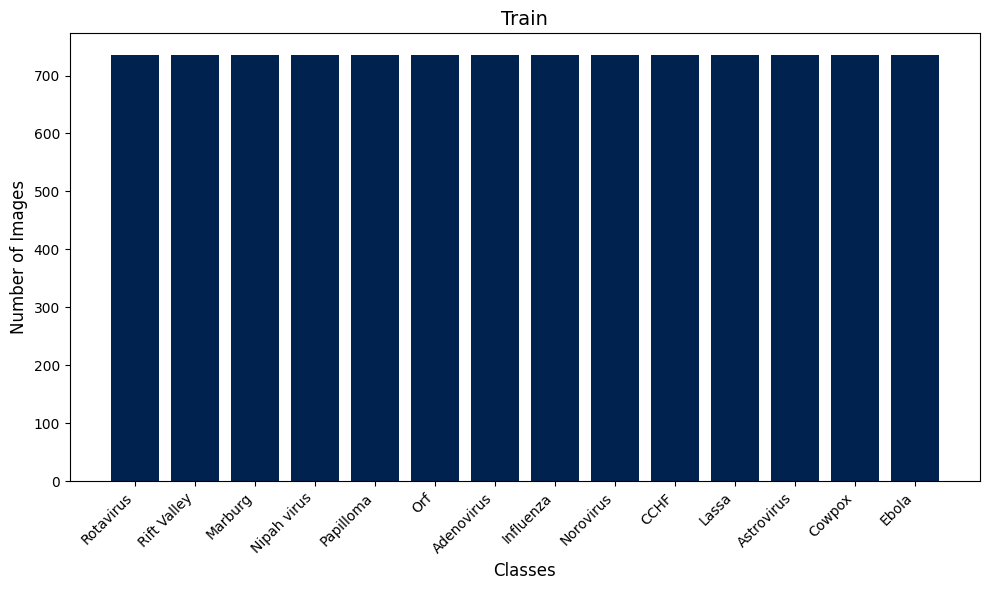

In [ ]:
def plot_bar_chart(image_counts):
    sorted_classes = sorted(image_counts.items(), key=lambda x: x[1], reverse=True)

    class_names, image_counts_values = zip(*sorted_classes)

    cmap = plt.cm.cividis
    norm = plt.Normalize(vmin=min(image_counts_values), vmax=max(image_counts_values))

    plt.figure(figsize=(10, 6))
    bars = plt.bar(class_names, image_counts_values, color=cmap(norm(image_counts_values)))

    plt.title('Train', fontsize=14)
    plt.xlabel('Classes', fontsize=12)
    plt.ylabel('Number of Images', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

input_folder = "/content/virus/TEM virus dataset/context_virus_1nm_256x256/augmented_train"

image_counts = count_images_in_classes(input_folder)

plot_bar_chart(image_counts)

<font color='#EADCA0'><h2>IMAGE PREPROCESSING AND HISTOGRAM</h2></font>
##### <font color='#E1CD76'>Step 1: Apply Histogram Equalization</font>
##### <font color='#E1CD76'> Step 2: Apply smoothing (Gaussian Blur)</font>
##### <font color='#E1CD76'> Step 3: Compute the histogram after preprocessing</font>
##### <font color='#E1CD76'> Step 4: Display the histogram </font>
##### <font color='#E1CD76'> Step 5: Apply histogram-based segmentation :Use Otsu's method to find the threshold </font>
##### <font color='#E1CD76'> Step 6: Visualize results</font>


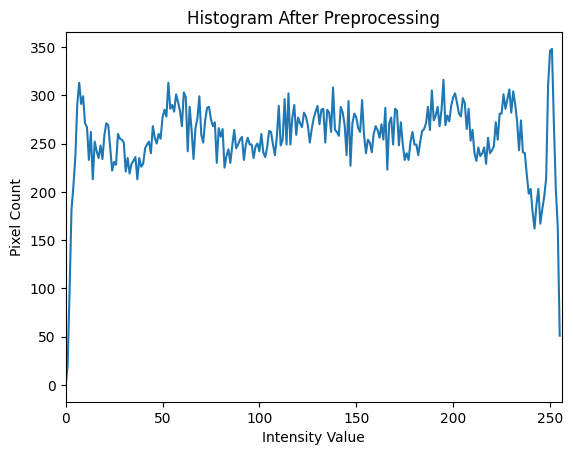

Threshold value (Otsu's method): 127.0


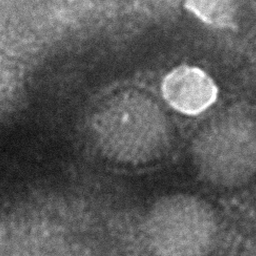

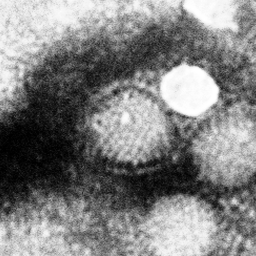

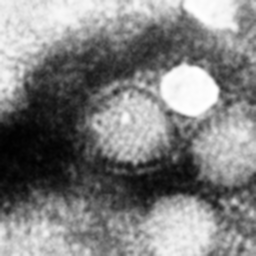

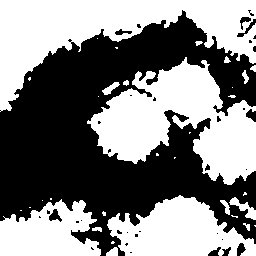

In [ ]:
image = cv2.imread('/content/virus/TEM virus dataset/context_virus_1nm_256x256/validation/Adenovirus/10_1.tif', cv2.IMREAD_GRAYSCALE)  # Load as grayscale

equalized_image = cv2.equalizeHist(image)

smoothed_image = cv2.GaussianBlur(equalized_image, (5, 5), 0)  # (5, 5) is the kernel size

hist = cv2.calcHist([smoothed_image], [0], None, [256], [0, 256])

plt.figure()
plt.title("Histogram After Preprocessing")
plt.xlabel("Intensity Value")
plt.ylabel("Pixel Count")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

_, segmented_image = cv2.threshold(smoothed_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(f"Threshold value (Otsu's method): {_}")

cv2_imshow(image)
cv2_imshow(equalized_image)
cv2_imshow(smoothed_image)
cv2_imshow(segmented_image)


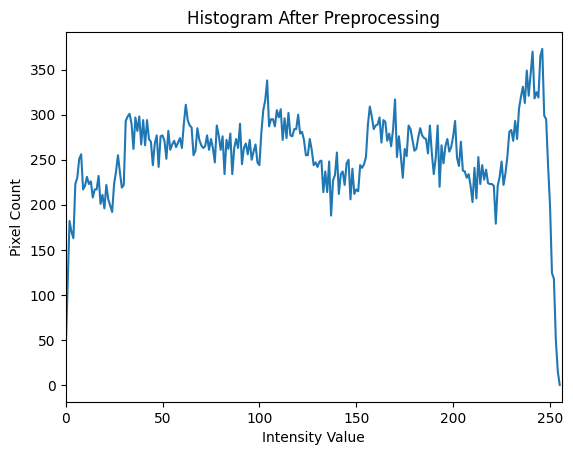

Threshold value (Otsu's method): 130.0


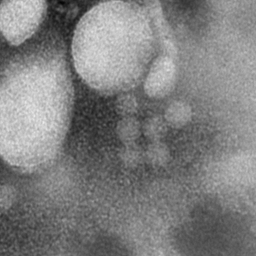

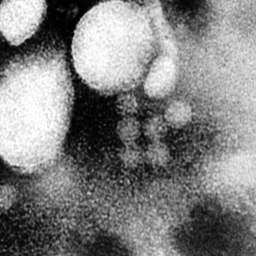

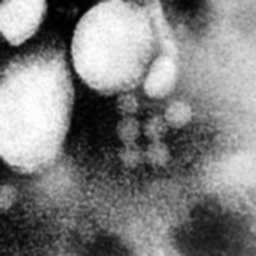

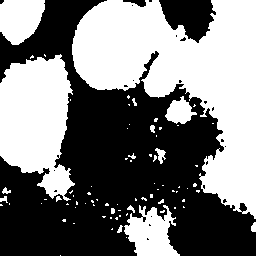

In [ ]:
image = cv2.imread('/content/virus/TEM virus dataset/context_virus_1nm_256x256/validation/Astrovirus/10_1.tif', cv2.IMREAD_GRAYSCALE)  # Load as grayscale

equalized_image = cv2.equalizeHist(image)

smoothed_image = cv2.GaussianBlur(equalized_image, (5, 5), 0)

hist = cv2.calcHist([smoothed_image], [0], None, [256], [0, 256])

plt.figure()
plt.title("Histogram After Preprocessing")
plt.xlabel("Intensity Value")
plt.ylabel("Pixel Count")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()


_, segmented_image = cv2.threshold(smoothed_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(f"Threshold value (Otsu's method): {_}")


cv2_imshow(image)
cv2_imshow(equalized_image)
cv2_imshow(smoothed_image)
cv2_imshow(segmented_image)


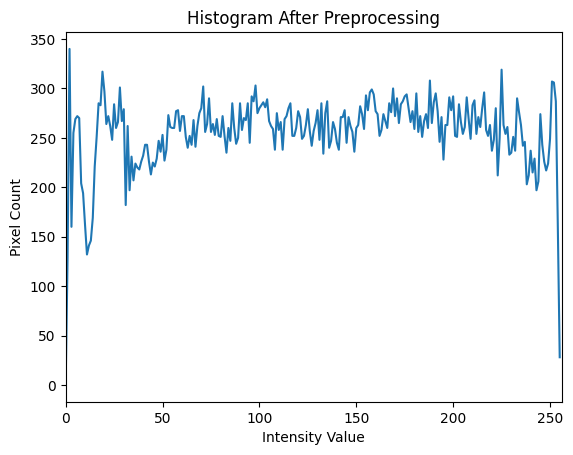

Threshold value (Otsu's method): 128.0


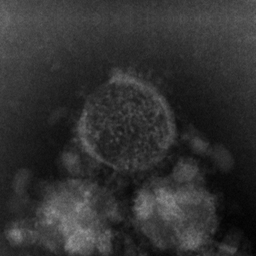

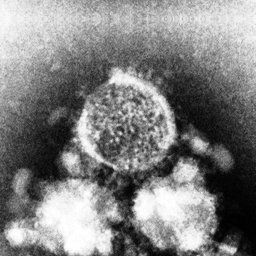

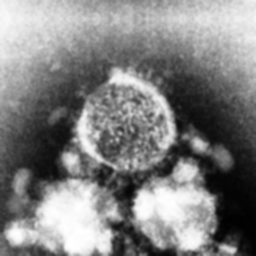

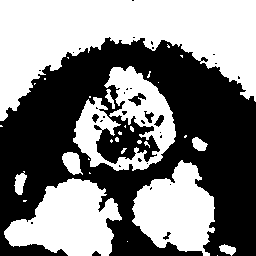

In [ ]:
image = cv2.imread('/content/virus/TEM virus dataset/context_virus_1nm_256x256/validation/CCHF/10_1.tif', cv2.IMREAD_GRAYSCALE)

equalized_image = cv2.equalizeHist(image)

smoothed_image = cv2.GaussianBlur(equalized_image, (5, 5), 0)

hist = cv2.calcHist([smoothed_image], [0], None, [256], [0, 256])

plt.figure()
plt.title("Histogram After Preprocessing")
plt.xlabel("Intensity Value")
plt.ylabel("Pixel Count")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()


_, segmented_image = cv2.threshold(smoothed_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(f"Threshold value (Otsu's method): {_}")

cv2_imshow(image)
cv2_imshow(equalized_image)
cv2_imshow(smoothed_image)
cv2_imshow(segmented_image)


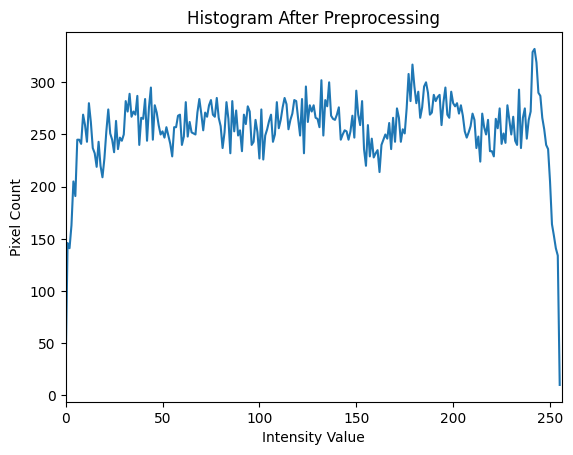

Threshold value (Otsu's method): 128.0


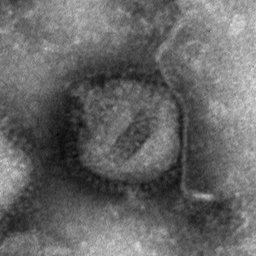

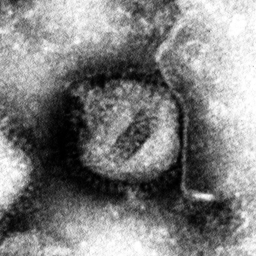

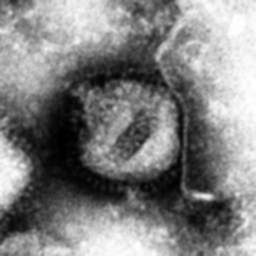

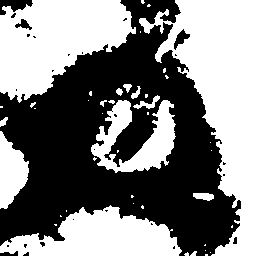

In [ ]:
image = cv2.imread('/content/virus/TEM virus dataset/context_virus_1nm_256x256/validation/Influenza/10_2.tif', cv2.IMREAD_GRAYSCALE)
equalized_image = cv2.equalizeHist(image)

smoothed_image = cv2.GaussianBlur(equalized_image, (5, 5), 0)

hist = cv2.calcHist([smoothed_image], [0], None, [256], [0, 256])

plt.figure()
plt.title("Histogram After Preprocessing")
plt.xlabel("Intensity Value")
plt.ylabel("Pixel Count")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()


_, segmented_image = cv2.threshold(smoothed_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(f"Threshold value (Otsu's method): {_}")

cv2_imshow(image)
cv2_imshow(equalized_image)
cv2_imshow(smoothed_image)
cv2_imshow(segmented_image)


<font color='#EADCA0'><h2>Steps for Balancing Data</h2></font>
###### <font color='#E1CD76'>
1.Shuffle and Resample: We can shuffle the data and resample the classes to either oversample the underrepresented classes or undersample the overrepresented ones.
</font>
###### <font color='#E1CD76'>
2.Stratified Splitting: This ensures that the proportion of each class in the training, validation, and test sets is kept consistent.
</font>



In [ ]:
source_folder = "/content/virus/TEM virus dataset/context_virus_1nm_256x256/augmented_train"
destination_folder = "/content/all"

shutil.copytree(source_folder, destination_folder)

print(f"Folder copied from {source_folder} to {destination_folder}")


Folder copied from /content/virus/TEM virus dataset/context_virus_1nm_256x256/augmented_train to /content/all


In [ ]:
source_folder = "/content/virus/TEM virus dataset/context_virus_1nm_256x256/validation"
destination_folder = "/content/all"

for item in os.listdir(source_folder):
    source_item = os.path.join(source_folder, item)
    destination_item = os.path.join(destination_folder, item)

    if os.path.isdir(source_item):
        shutil.copytree(source_item, destination_item, dirs_exist_ok=True)
    else:
        shutil.copy2(source_item, destination_item)

print(f"Files have been copied from {source_folder} to {destination_folder}")


Files have been copied from /content/virus/TEM virus dataset/context_virus_1nm_256x256/validation to /content/all


In [ ]:
source_folder = "/content/virus/TEM virus dataset/context_virus_1nm_256x256/test"
destination_folder = "/content/all"

for item in os.listdir(source_folder):
    source_item = os.path.join(source_folder, item)
    destination_item = os.path.join(destination_folder, item)

    if os.path.isdir(source_item):
        shutil.copytree(source_item, destination_item, dirs_exist_ok=True)
    else:
        shutil.copy2(source_item, destination_item)

print(f"Files have been copied from {source_folder} to {destination_folder}")


Files have been copied from /content/virus/TEM virus dataset/context_virus_1nm_256x256/test to /content/all


In [ ]:
source_folder = "/content/virus/TEM virus dataset/context_virus_1nm_256x256/train"
destination_folder = "/content/all"

for item in os.listdir(source_folder):
    source_item = os.path.join(source_folder, item)
    destination_item = os.path.join(destination_folder, item)

    if os.path.isdir(source_item):
        shutil.copytree(source_item, destination_item, dirs_exist_ok=True)
    else:
        shutil.copy2(source_item, destination_item)

print(f"Files have been copied from {source_folder} to {destination_folder}")


Files have been copied from /content/virus/TEM virus dataset/context_virus_1nm_256x256/train to /content/all


In [ ]:
source_folder = "/content/virus/TEM virus dataset/context_virus_RAW/test"
destination_folder = "/content/all"

folders_to_copy = [
    "Rotavirus", "Papilloma", "Influenza", "Adenovirus", "Lassa",
    "Orf", "CCHF", "Astrovirus", "Cowpox", "Norovirus",
    "Nipah virus", "Marburg", "Rift Valley", "Ebola"]

os.makedirs(destination_folder, exist_ok=True)

for folder_name in folders_to_copy:
    source_item = os.path.join(source_folder, folder_name)
    destination_item = os.path.join(destination_folder, folder_name)

    if os.path.exists(source_item):
        os.makedirs(destination_item, exist_ok=True)
        for item in os.listdir(source_item):
            source_path = os.path.join(source_item, item)
            destination_path = os.path.join(destination_item, item)

            if os.path.isdir(source_path):
                shutil.copytree(source_path, destination_path, dirs_exist_ok=True)
            else:
                shutil.copy2(source_path, destination_path)

        print(f"Copied: {folder_name} to {destination_item}")
    else:
        print(f"Folder not found: {folder_name}")

print(f"Selected folders have been copied to {destination_folder}")


Copied: Rotavirus to /content/all/Rotavirus
Copied: Papilloma to /content/all/Papilloma
Copied: Influenza to /content/all/Influenza
Copied: Adenovirus to /content/all/Adenovirus
Copied: Lassa to /content/all/Lassa
Copied: Orf to /content/all/Orf
Copied: CCHF to /content/all/CCHF
Copied: Astrovirus to /content/all/Astrovirus
Copied: Cowpox to /content/all/Cowpox
Copied: Norovirus to /content/all/Norovirus
Copied: Nipah virus to /content/all/Nipah virus
Copied: Marburg to /content/all/Marburg
Copied: Rift Valley to /content/all/Rift Valley
Copied: Ebola to /content/all/Ebola
Selected folders have been copied to /content/all


In [ ]:
source_folder = "/content/virus/TEM virus dataset/context_virus_RAW/train"
destination_folder = "/content/all"

folders_to_copy = [
    "Rotavirus", "Papilloma", "Influenza", "Adenovirus", "Lassa",
    "Orf", "CCHF", "Astrovirus", "Cowpox", "Norovirus",
    "Nipah virus", "Marburg", "Rift Valley", "Ebola"]

os.makedirs(destination_folder, exist_ok=True)

for folder_name in folders_to_copy:
    source_item = os.path.join(source_folder, folder_name)
    destination_item = os.path.join(destination_folder, folder_name)

    if os.path.exists(source_item):
        os.makedirs(destination_item, exist_ok=True)
        for item in os.listdir(source_item):
            source_path = os.path.join(source_item, item)
            destination_path = os.path.join(destination_item, item)

            if os.path.isdir(source_path):
                shutil.copytree(source_path, destination_path, dirs_exist_ok=True)
            else:
                shutil.copy2(source_path, destination_path)

        print(f"Copied: {folder_name} to {destination_item}")
    else:
        print(f"Folder not found: {folder_name}")

print(f"Selected folders have been copied to {destination_folder}")


Copied: Rotavirus to /content/all/Rotavirus
Copied: Papilloma to /content/all/Papilloma
Copied: Influenza to /content/all/Influenza
Copied: Adenovirus to /content/all/Adenovirus
Copied: Lassa to /content/all/Lassa
Copied: Orf to /content/all/Orf
Copied: CCHF to /content/all/CCHF
Copied: Astrovirus to /content/all/Astrovirus
Copied: Cowpox to /content/all/Cowpox
Copied: Norovirus to /content/all/Norovirus
Copied: Nipah virus to /content/all/Nipah virus
Copied: Marburg to /content/all/Marburg
Copied: Rift Valley to /content/all/Rift Valley
Copied: Ebola to /content/all/Ebola
Selected folders have been copied to /content/all


In [ ]:
source_folder = "/content/virus/TEM virus dataset/context_virus_RAW/validation"
destination_folder = "/content/all"

folders_to_copy = [
    "Rotavirus", "Papilloma", "Influenza", "Adenovirus", "Lassa",
    "Orf", "CCHF", "Astrovirus", "Cowpox", "Norovirus",
    "Nipah virus", "Marburg", "Rift Valley", "Ebola"]

os.makedirs(destination_folder, exist_ok=True)

for folder_name in folders_to_copy:
    source_item = os.path.join(source_folder, folder_name)
    destination_item = os.path.join(destination_folder, folder_name)

    if os.path.exists(source_item):
        os.makedirs(destination_item, exist_ok=True)
        for item in os.listdir(source_item):
            source_path = os.path.join(source_item, item)
            destination_path = os.path.join(destination_item, item)

            if os.path.isdir(source_path):
                shutil.copytree(source_path, destination_path, dirs_exist_ok=True)
            else:
                shutil.copy2(source_path, destination_path)

        print(f"Copied: {folder_name} to {destination_item}")
    else:
        print(f"Folder not found: {folder_name}")

print(f"Selected folders have been copied to {destination_folder}")


Copied: Rotavirus to /content/all/Rotavirus
Copied: Papilloma to /content/all/Papilloma
Copied: Influenza to /content/all/Influenza
Copied: Adenovirus to /content/all/Adenovirus
Copied: Lassa to /content/all/Lassa
Copied: Orf to /content/all/Orf
Copied: CCHF to /content/all/CCHF
Copied: Astrovirus to /content/all/Astrovirus
Copied: Cowpox to /content/all/Cowpox
Copied: Norovirus to /content/all/Norovirus
Copied: Nipah virus to /content/all/Nipah virus
Copied: Marburg to /content/all/Marburg
Copied: Rift Valley to /content/all/Rift Valley
Copied: Ebola to /content/all/Ebola
Selected folders have been copied to /content/all


In [ ]:
folder_path = "/content/all/_EXCLUDED"

if os.path.exists(folder_path):
    shutil.rmtree(folder_path)
    print(f"Folder '{folder_path}' and all its contents have been removed.")
else:
    print(f"Folder '{folder_path}' does not exist.")


Folder '/content/all/_EXCLUDED' and all its contents have been removed.


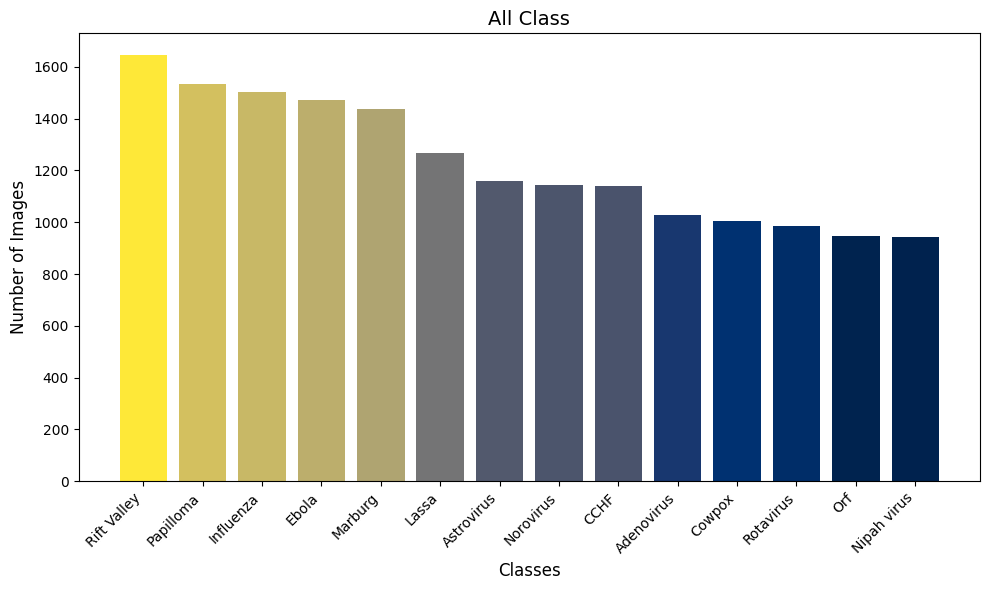

In [ ]:
def plot_bar_chart(image_counts):
    sorted_classes = sorted(image_counts.items(), key=lambda x: x[1], reverse=True)

    class_names, image_counts_values = zip(*sorted_classes)

    cmap = plt.cm.cividis
    norm = plt.Normalize(vmin=min(image_counts_values), vmax=max(image_counts_values))

    plt.figure(figsize=(10, 6))
    bars = plt.bar(class_names, image_counts_values, color=cmap(norm(image_counts_values)))

    plt.title('All Class', fontsize=14)
    plt.xlabel('Classes', fontsize=12)
    plt.ylabel('Number of Images', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

input_folder = "/content/all"

image_counts = count_images_in_classes(input_folder)
plot_bar_chart(image_counts)

<font color='#EADCA0'><h2>RESPLITING DATASET INTO TRAIN, VALIDATION, AND TEST SETS</h2></font>
###### <font color='#E1CD76'>Split the data (80% train, 10% val, 10% test)</font>


In [ ]:
output_dir = '/content/all'

class_names = [
    "Rotavirus", "Papilloma", "Influenza", "Adenovirus", "Lassa",
    "Orf", "CCHF", "Astrovirus", "Cowpox", "Norovirus",
    "Nipah virus", "Marburg", "Rift Valley", "Ebola"]

for class_name in class_names:
    class_dir = os.path.join(output_dir, class_name)

    if os.path.exists(class_dir):
        num_images = len(os.listdir(class_dir))
        print(f"{class_name}: {num_images} images")
    else:
        print(f"Directory not found: {class_dir}")


Rotavirus: 950 images
Papilloma: 1504 images
Influenza: 1411 images
Adenovirus: 963 images
Lassa: 1165 images
Orf: 884 images
CCHF: 1067 images
Astrovirus: 1085 images
Cowpox: 956 images
Norovirus: 1091 images
Nipah virus: 902 images
Marburg: 1345 images
Rift Valley: 1519 images
Ebola: 1365 images


In [ ]:
base_dir = '/content/all'
train_dir = '/content/process/train'
val_dir = '/content/process/val'
test_dir = '/content/process/test'

class_names = [
    "Rotavirus", "Papilloma", "Influenza", "Adenovirus", "Lassa",
    "Orf", "CCHF", "Astrovirus", "Cowpox", "Norovirus",
    "Nipah virus", "Marburg", "Rift Valley", "Ebola"]

random_state = 42
random.seed(random_state)

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

for class_name in class_names:
    class_dir = os.path.join(base_dir, class_name)

    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

    images = [f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))]
    random.shuffle(images)

    num_images = len(images)
    train_size = int(0.8 * num_images)
    val_size = int(0.1 * num_images)

    train_images = images[:train_size]
    val_images = images[train_size:train_size + val_size]
    test_images = images[train_size + val_size:]

    for img_name in train_images:
        shutil.copy(os.path.join(class_dir, img_name), os.path.join(train_dir, class_name, img_name))
    for img_name in val_images:
        shutil.copy(os.path.join(class_dir, img_name), os.path.join(val_dir, class_name, img_name))
    for img_name in test_images:
        shutil.copy(os.path.join(class_dir, img_name), os.path.join(test_dir, class_name, img_name))

print("Dataset split into train, validation, and test sets.")


Dataset split into train, validation, and test sets.


<ipython-input-21-ca316e48e50c>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='class', y='count', data=sorted_df, palette='viridis')  # Create the bar plot


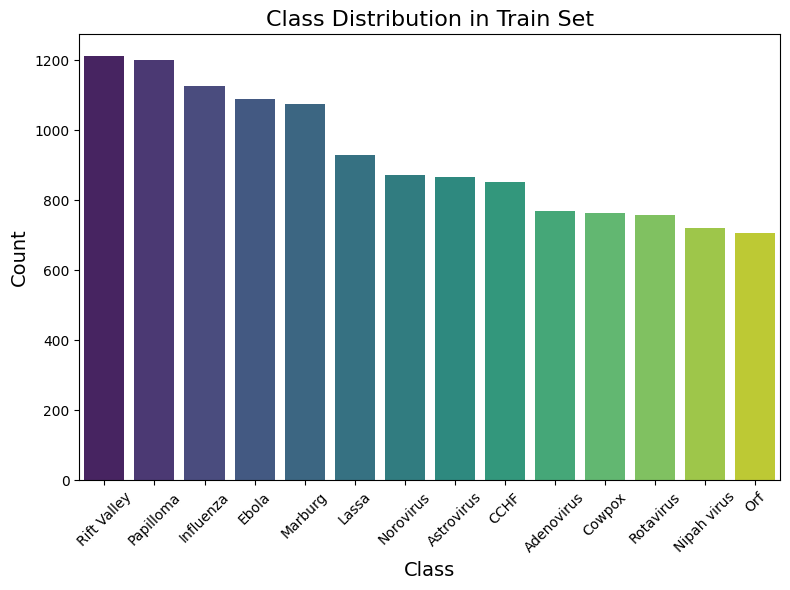

In [ ]:
train_dir = '/content/process/train'

categories =[
    "Rotavirus", "Papilloma", "Influenza", "Adenovirus", "Lassa",
    "Orf", "CCHF", "Astrovirus", "Cowpox", "Norovirus",
    "Nipah virus", "Marburg", "Rift Valley", "Ebola"]


train_labels = []

for category in categories:
    category_path = os.path.join(train_dir, category)
    num_files = len(os.listdir(category_path))

    train_labels += [category] * num_files

df = pd.DataFrame({'class': train_labels})

class_counts = df['class'].value_counts().sort_values(ascending=False)

sorted_df = pd.DataFrame({'class': class_counts.index, 'count': class_counts.values})

plt.figure(figsize=(8, 6))
sns.barplot(x='class', y='count', data=sorted_df, palette='viridis')
plt.title('Class Distribution in Train Set', fontsize=16)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


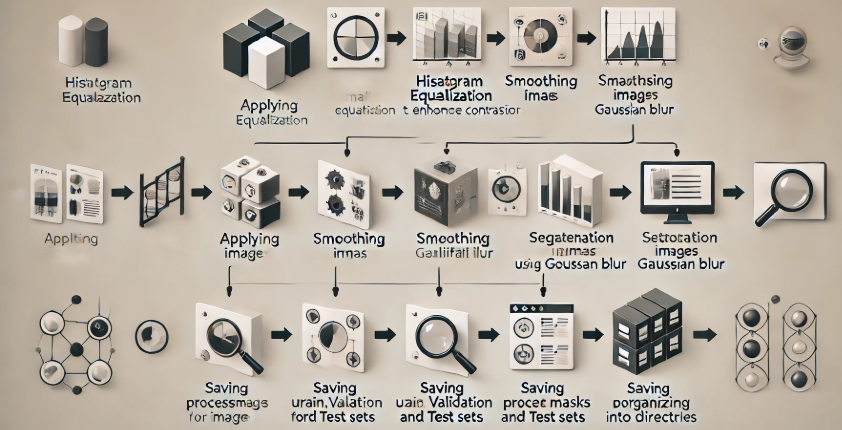
<font color='#EADCA0'><h2>Image Processing Pipeline:</h2></font>
###### <font color='#E1CD76'>
1.Applying Histogram Equalization to Enhance Image Contrast<br>
2.Smoothing Images Using Gaussian Blur<br>
3.Segmentation Using Otsu's Method for Mask Creation<br>
4.Saving Processed Masks for Train, Validation, and Test Sets<br>
5.Processing and Organizing Masked Images into Directories<br>
</font>

In [ ]:
train_dir = '/content/process/train'
val_dir = '/content/process/val'
test_dir = '/content/process/test'

processed_train_dir = '/content/proces/train'
processed_val_dir = '/content/proces/val'
processed_test_dir = '/content/proces/test'

class_names = [
    "Rotavirus", "Papilloma", "Influenza", "Adenovirus", "Lassa",
    "Orf", "CCHF", "Astrovirus", "Cowpox", "Norovirus",
    "Nipah virus", "Marburg", "Rift Valley", "Ebola"]

def apply_mask(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        print(f"Error loading image: {image_path}")
        return None

    equalized_image = cv2.equalizeHist(image)
    smoothed_image = cv2.GaussianBlur(equalized_image, (5, 5), 0)
    _, segmented_image = cv2.threshold(smoothed_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return segmented_image

os.makedirs(processed_train_dir, exist_ok=True)
os.makedirs(processed_val_dir, exist_ok=True)
os.makedirs(processed_test_dir, exist_ok=True)

for class_name in class_names:
    class_train_dir = os.path.join(train_dir, class_name)
    class_val_dir = os.path.join(val_dir, class_name)
    class_test_dir = os.path.join(test_dir, class_name)
    processed_class_train_dir = os.path.join(processed_train_dir, class_name)
    processed_class_val_dir = os.path.join(processed_val_dir, class_name)
    processed_class_test_dir = os.path.join(processed_test_dir, class_name)

    os.makedirs(processed_class_train_dir, exist_ok=True)
    os.makedirs(processed_class_val_dir, exist_ok=True)
    os.makedirs(processed_class_test_dir, exist_ok=True)

    for img_name in os.listdir(class_train_dir):
        image_path = os.path.join(class_train_dir, img_name)
        mask = apply_mask(image_path)
        if mask is not None:
            mask_save_path = os.path.join(processed_class_train_dir, img_name)
            cv2.imwrite(mask_save_path, mask)
    for img_name in os.listdir(class_val_dir):
        image_path = os.path.join(class_val_dir, img_name)
        mask = apply_mask(image_path)
        if mask is not None:
            mask_save_path = os.path.join(processed_class_val_dir, img_name)
            cv2.imwrite(mask_save_path, mask)

    for img_name in os.listdir(class_test_dir):
        image_path = os.path.join(class_test_dir, img_name)
        mask = apply_mask(image_path)
        if mask is not None:
            mask_save_path = os.path.join(processed_class_test_dir, img_name)
            cv2.imwrite(mask_save_path, mask)

print("Mask processing applied and masks saved in the processed folders.")


Mask processing applied and masks saved in the processed folders.


<font color='#EADCA0'><h2>Display Images From Each Class</h2></font>


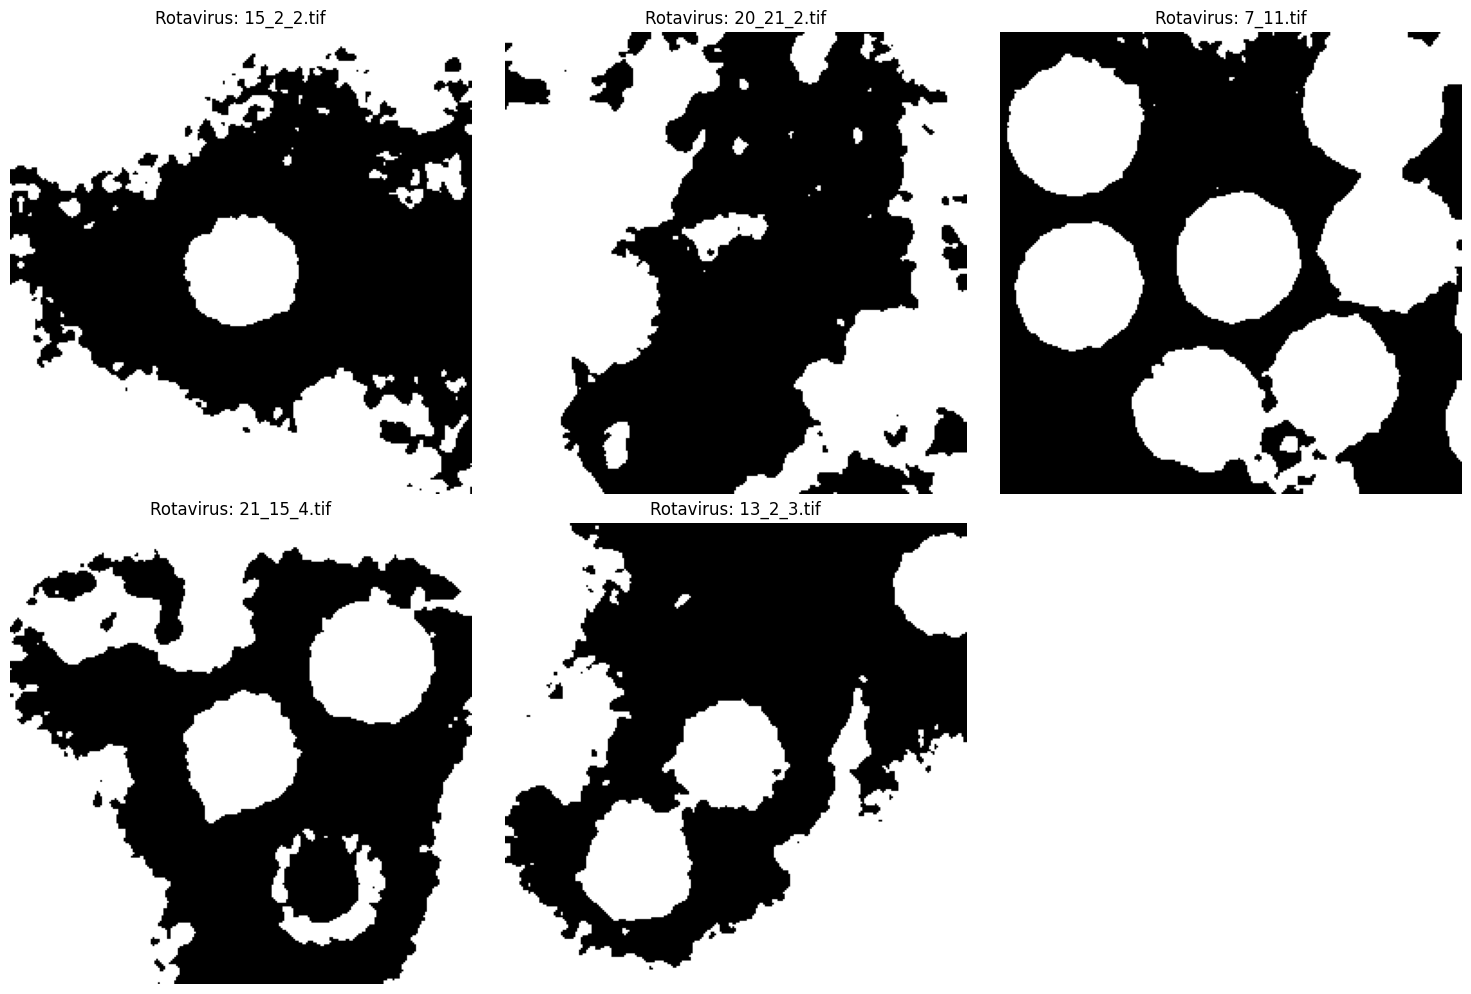

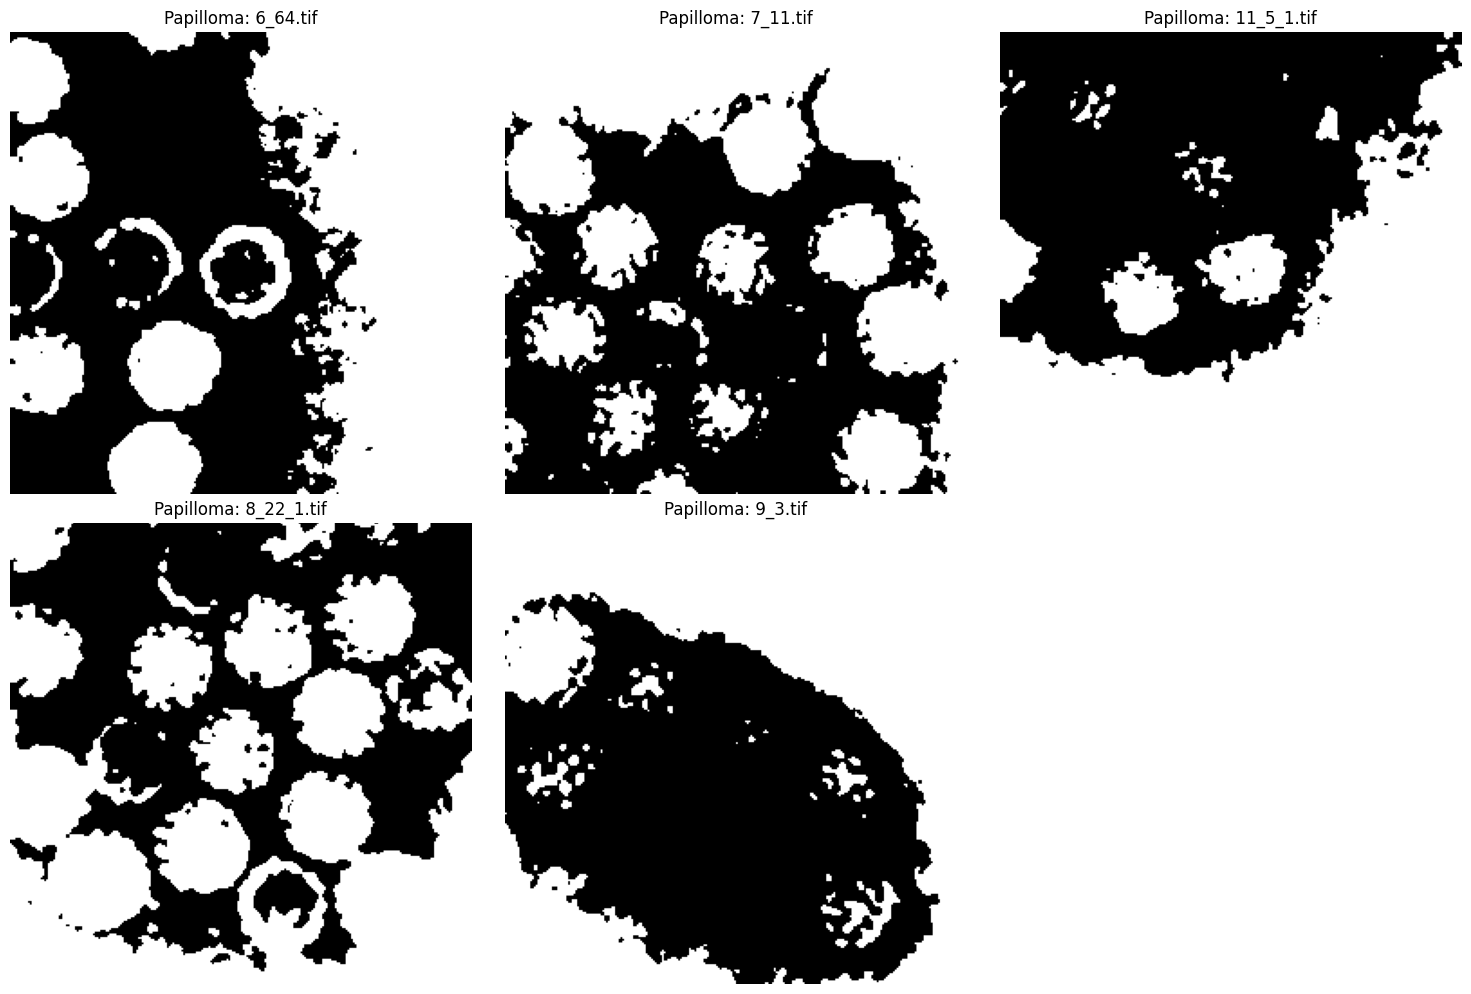

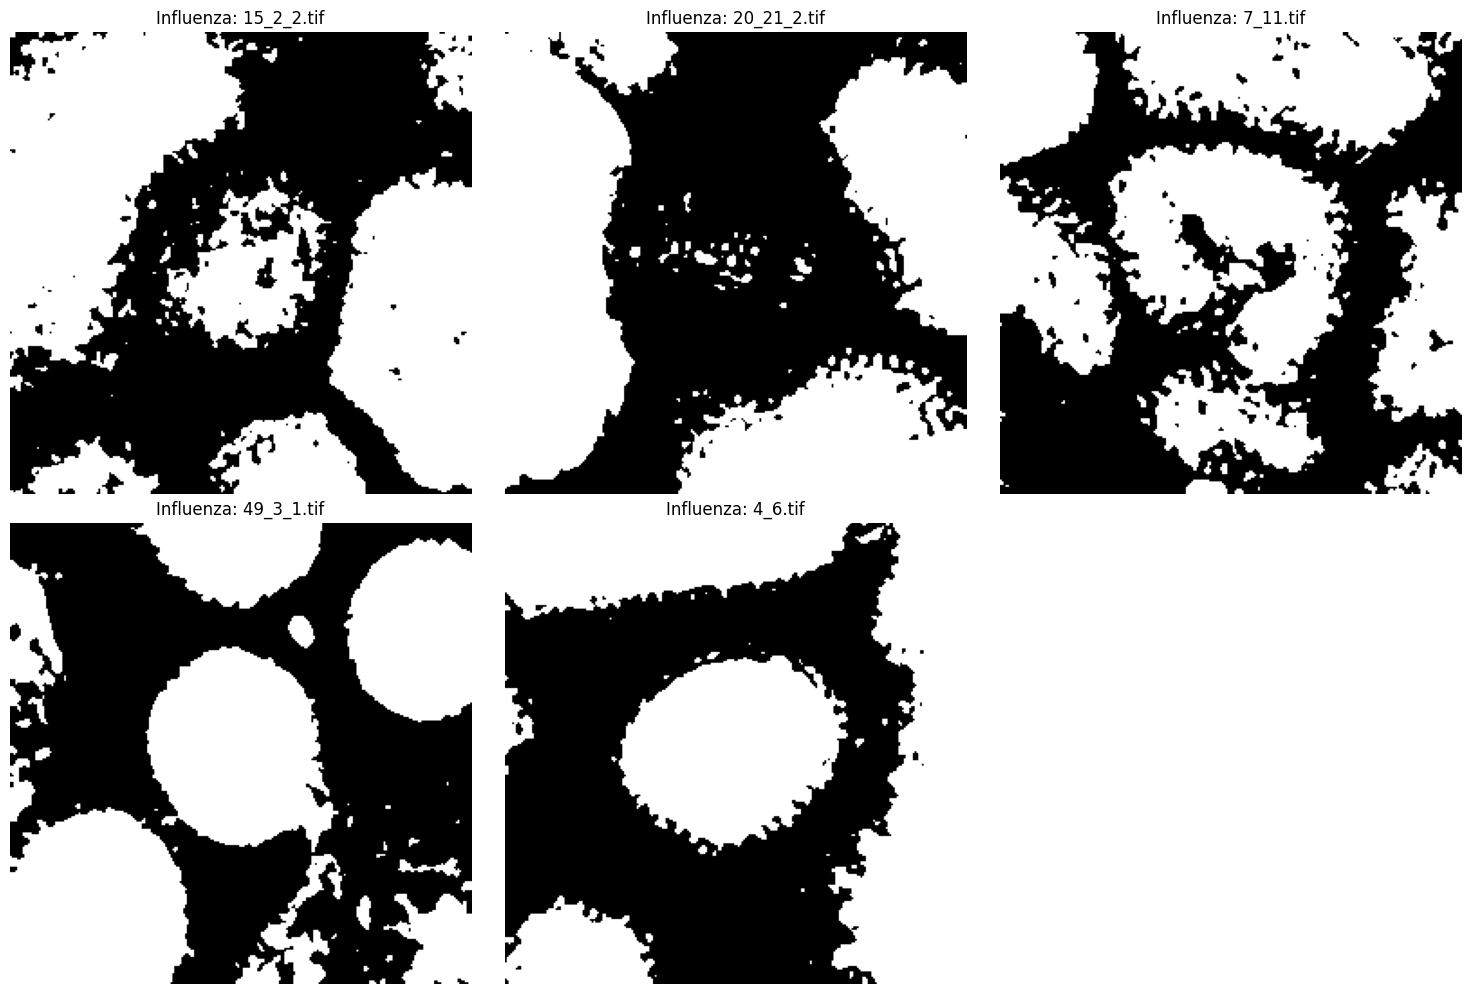

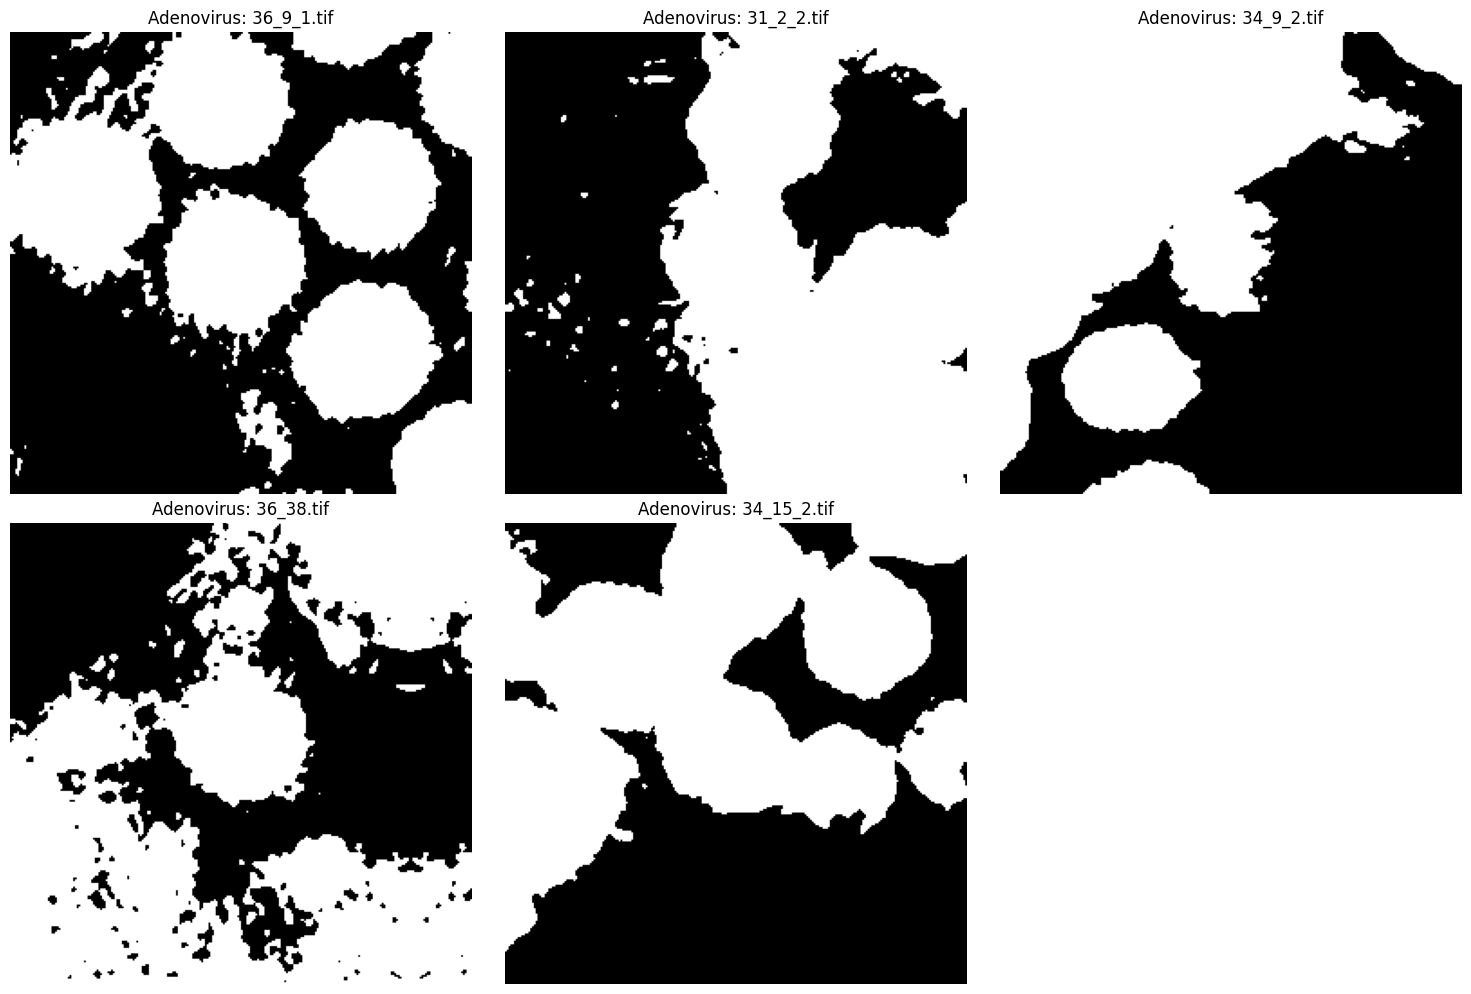

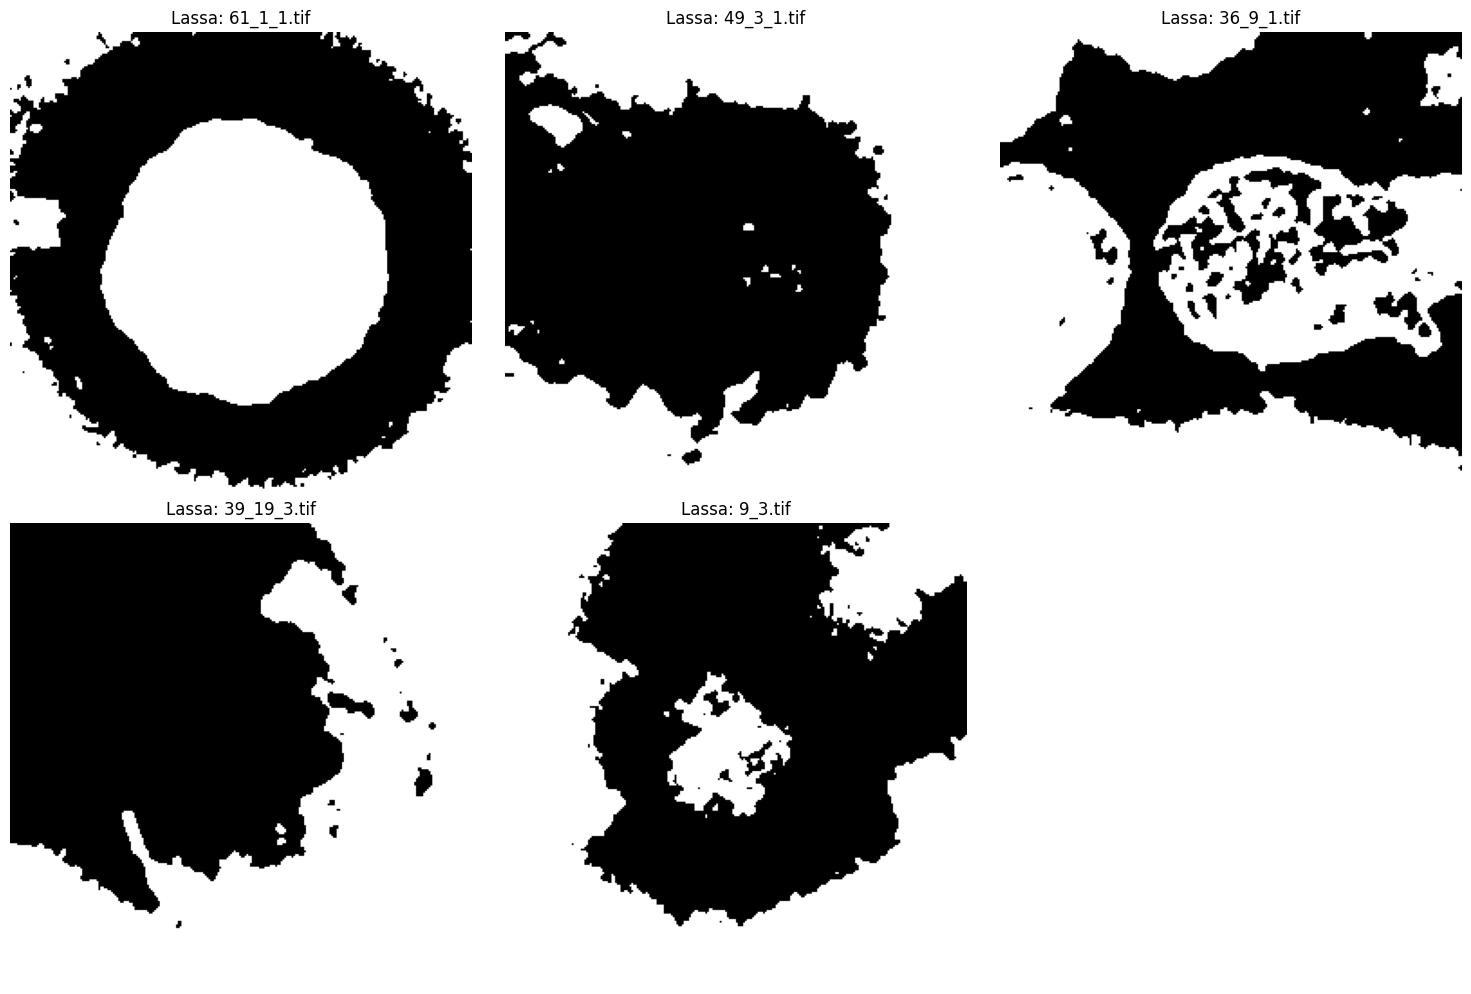

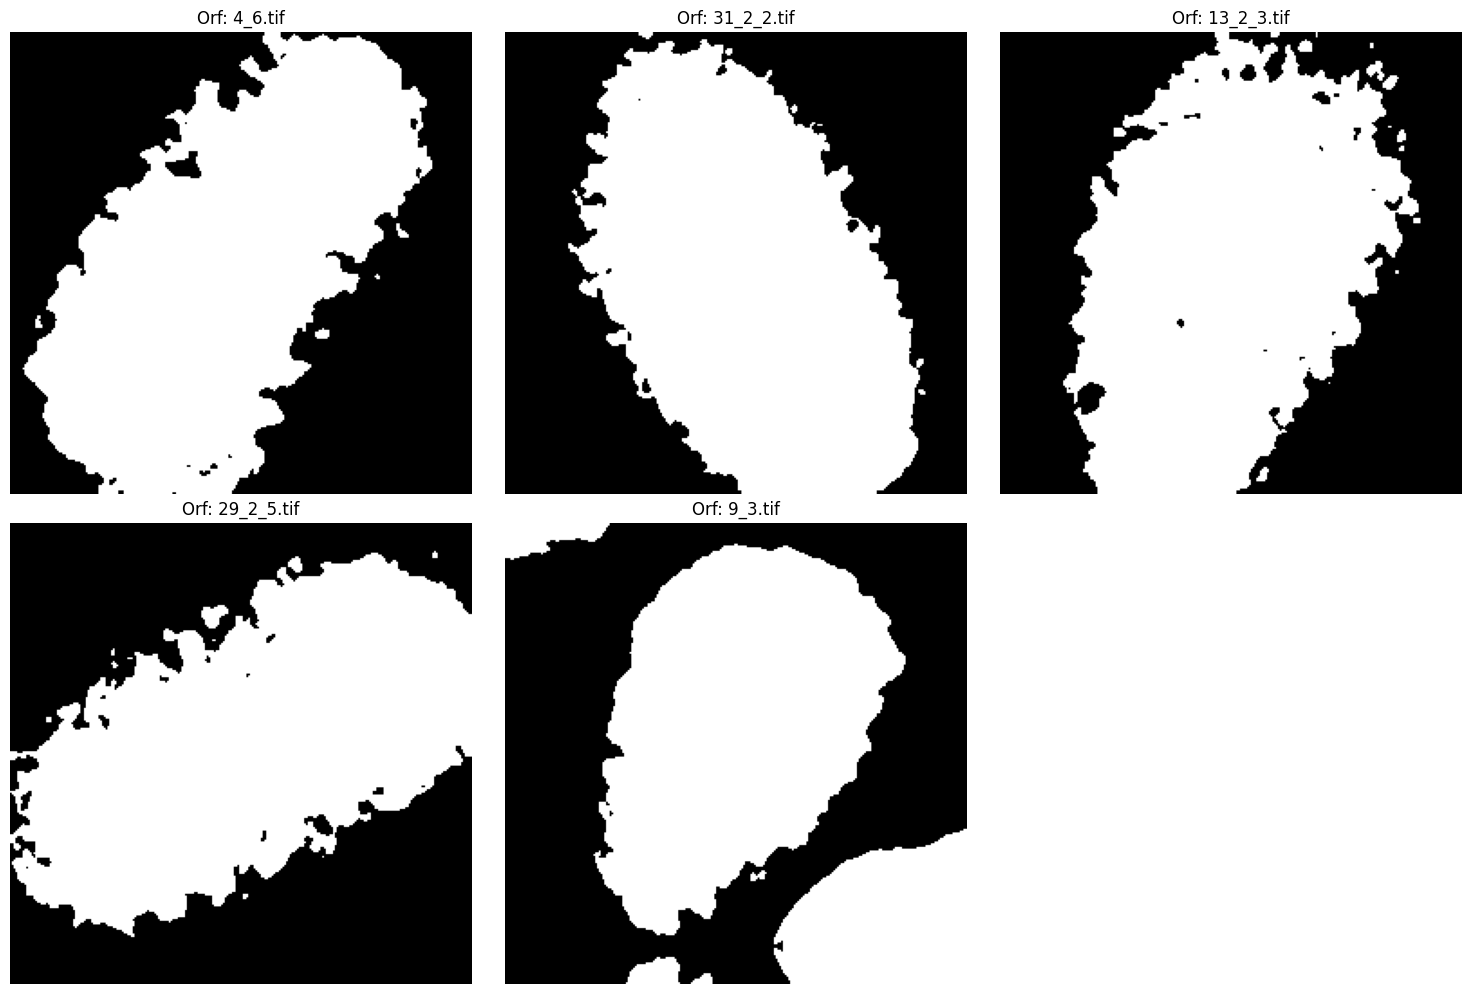

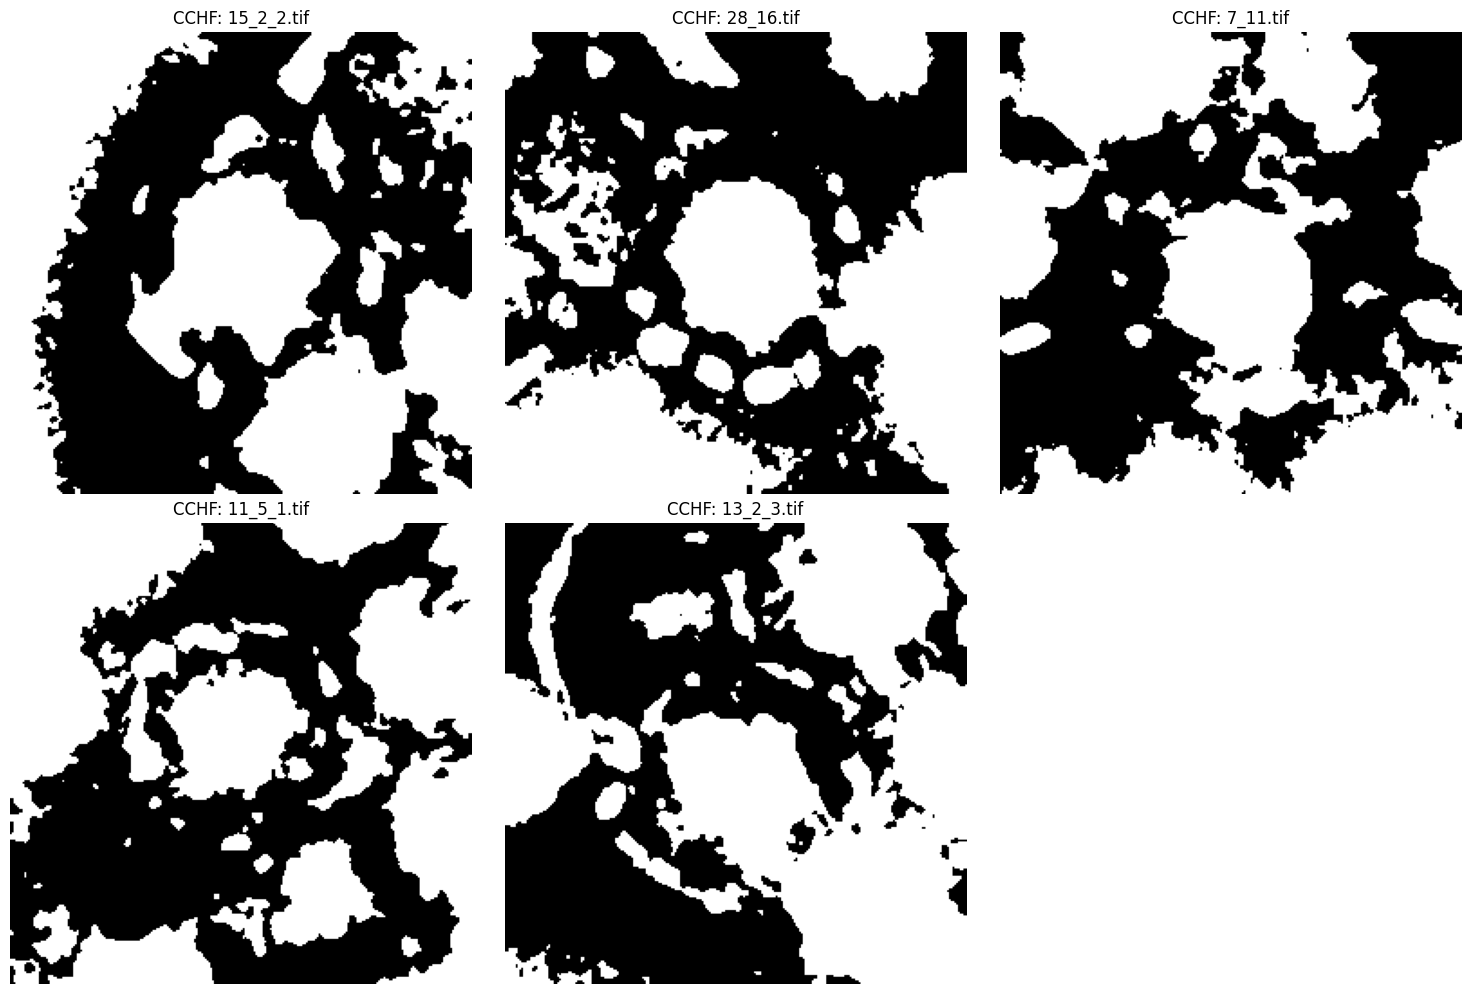

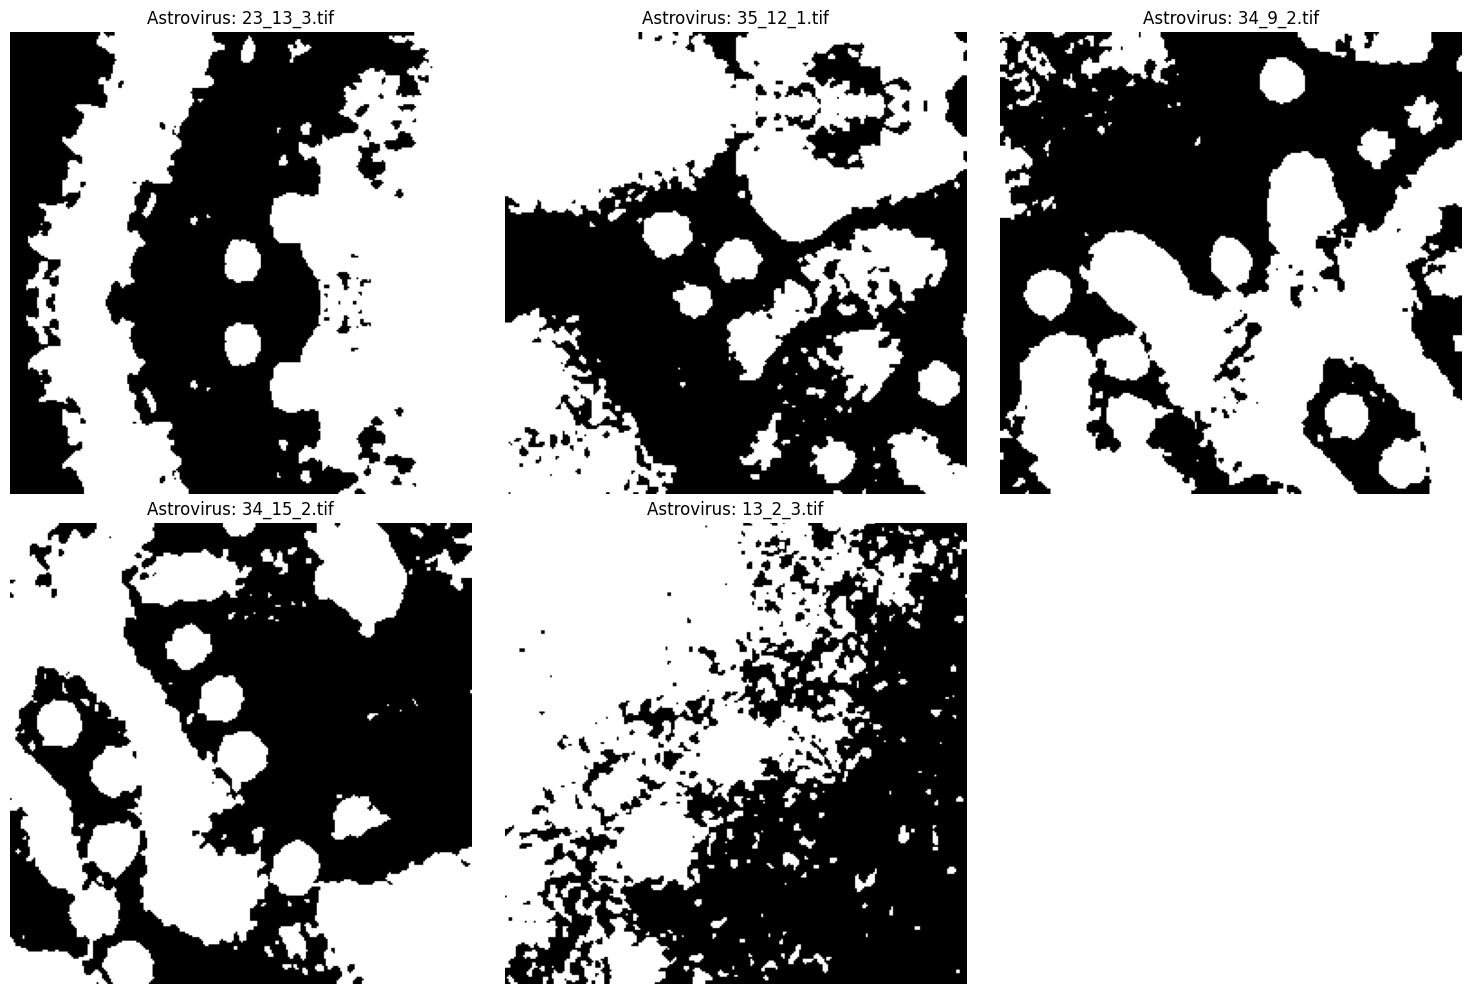

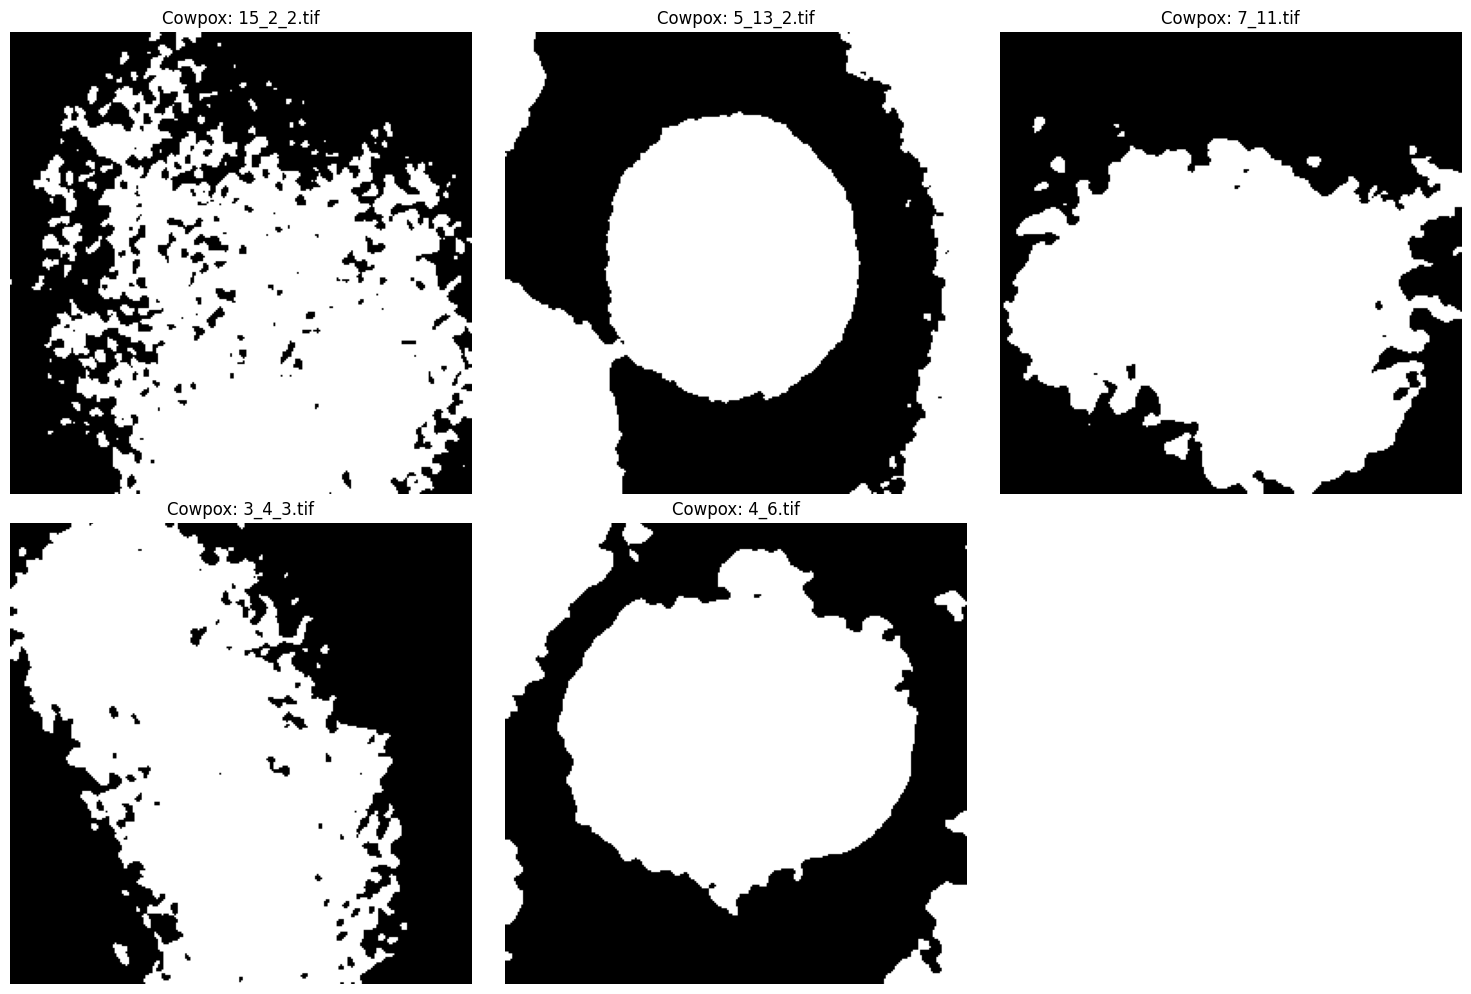

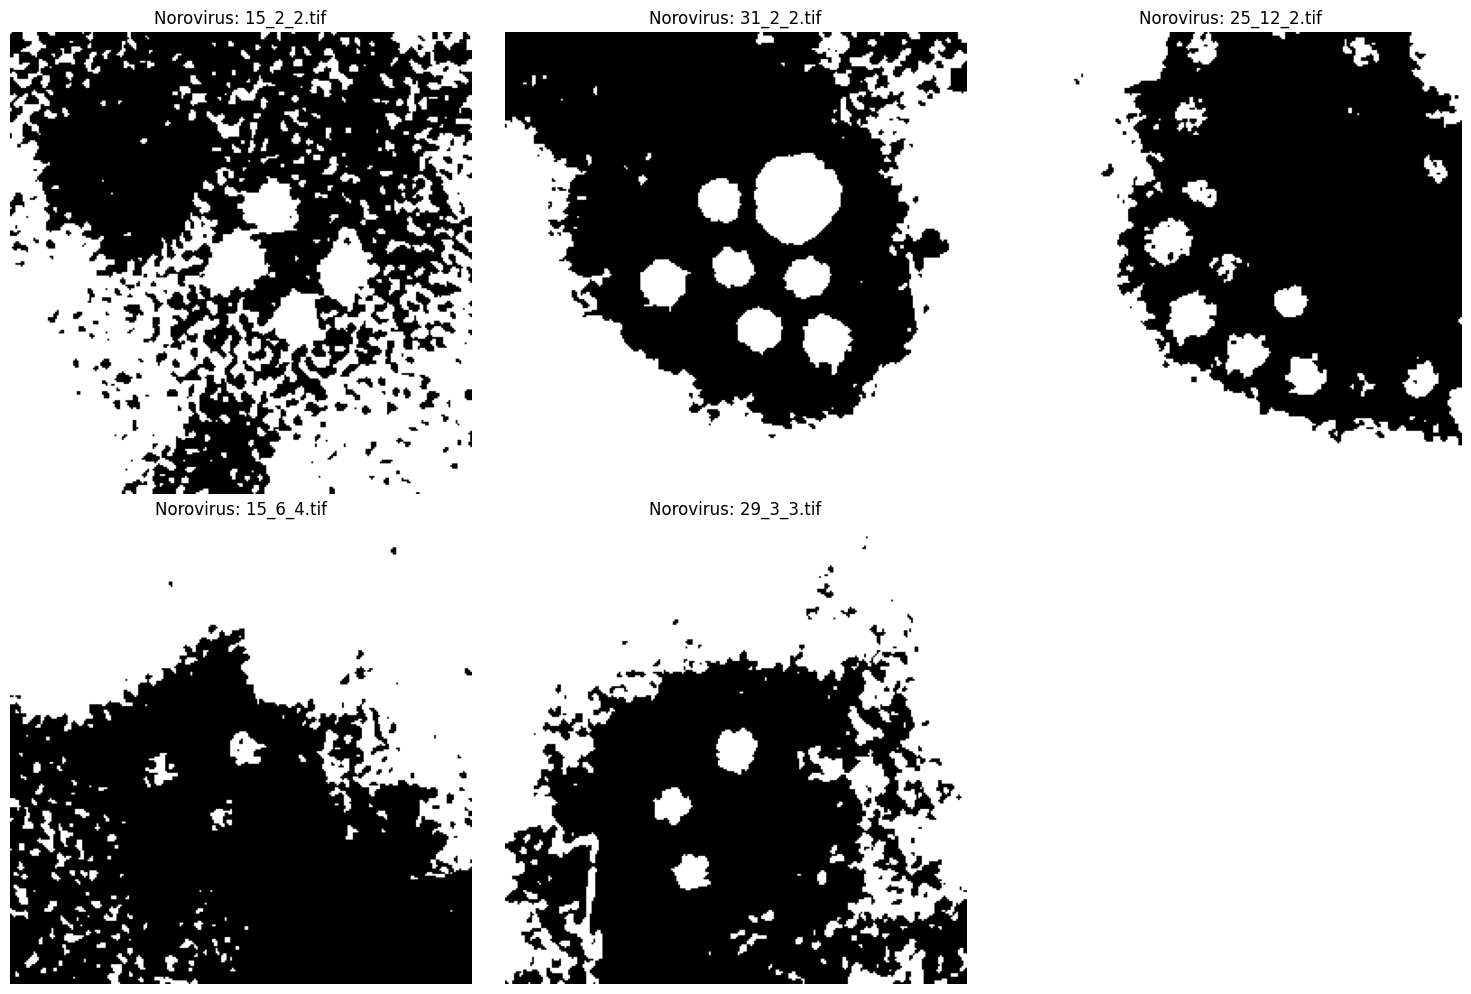

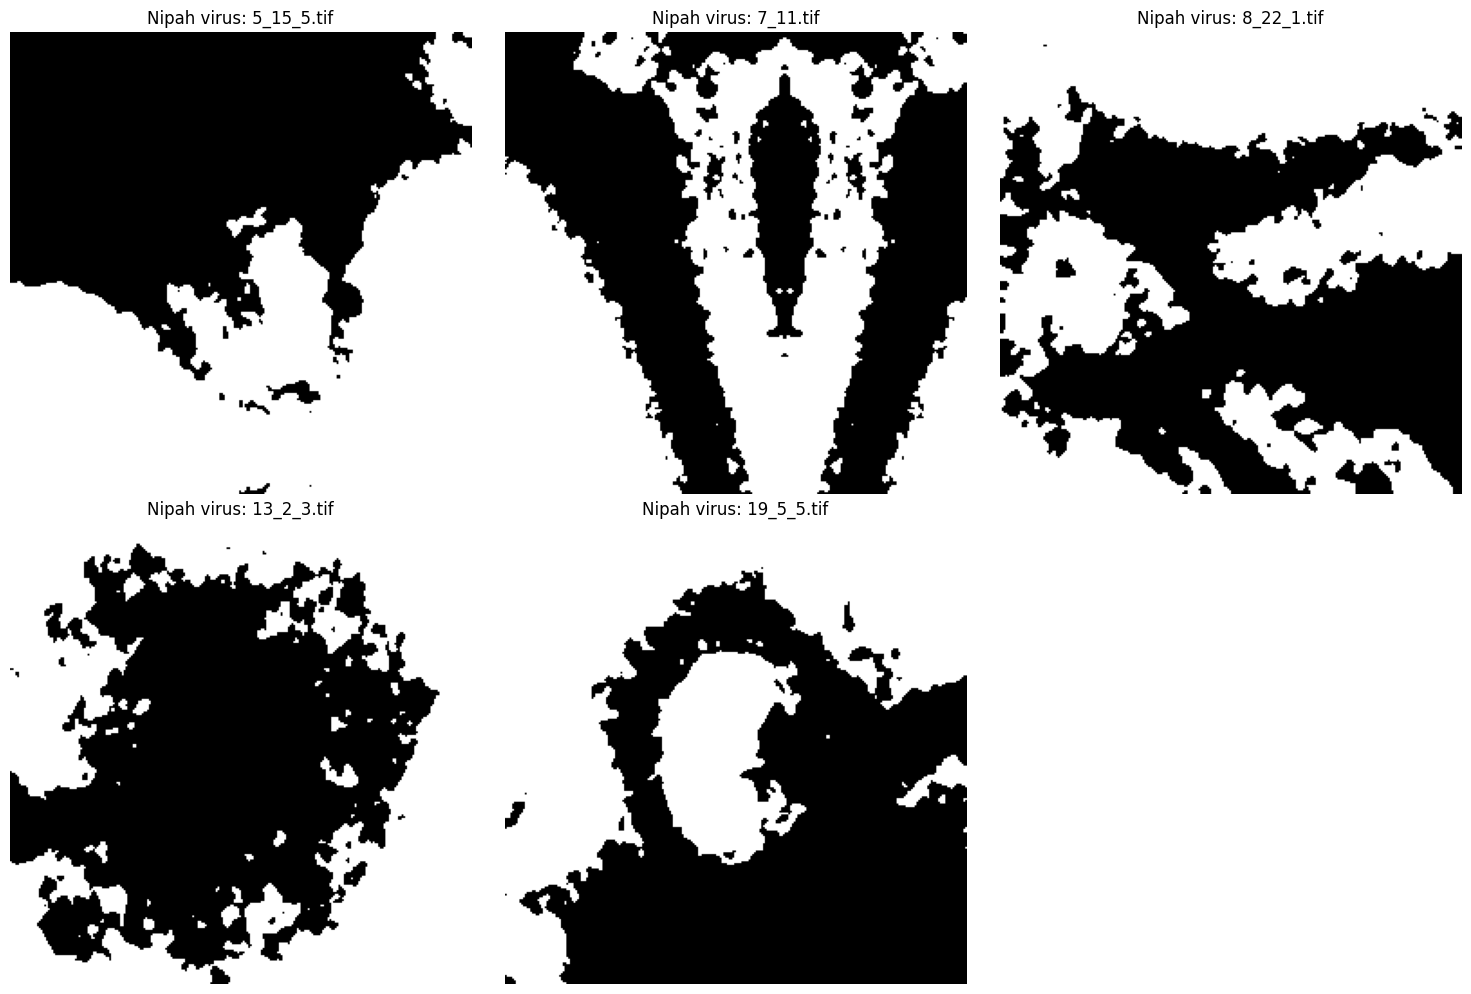

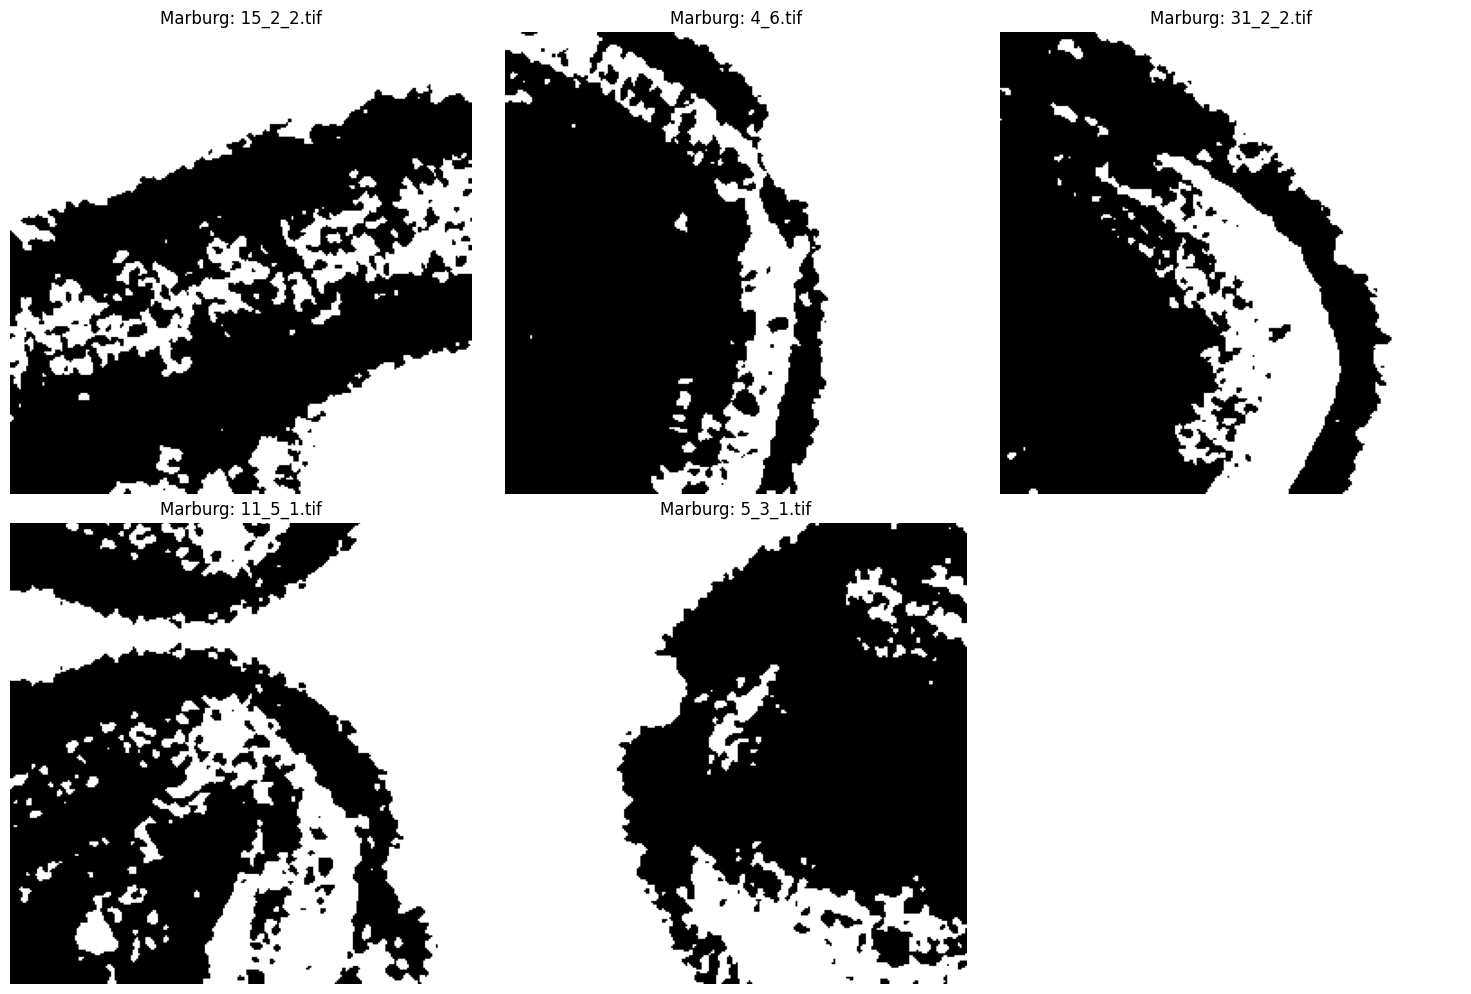

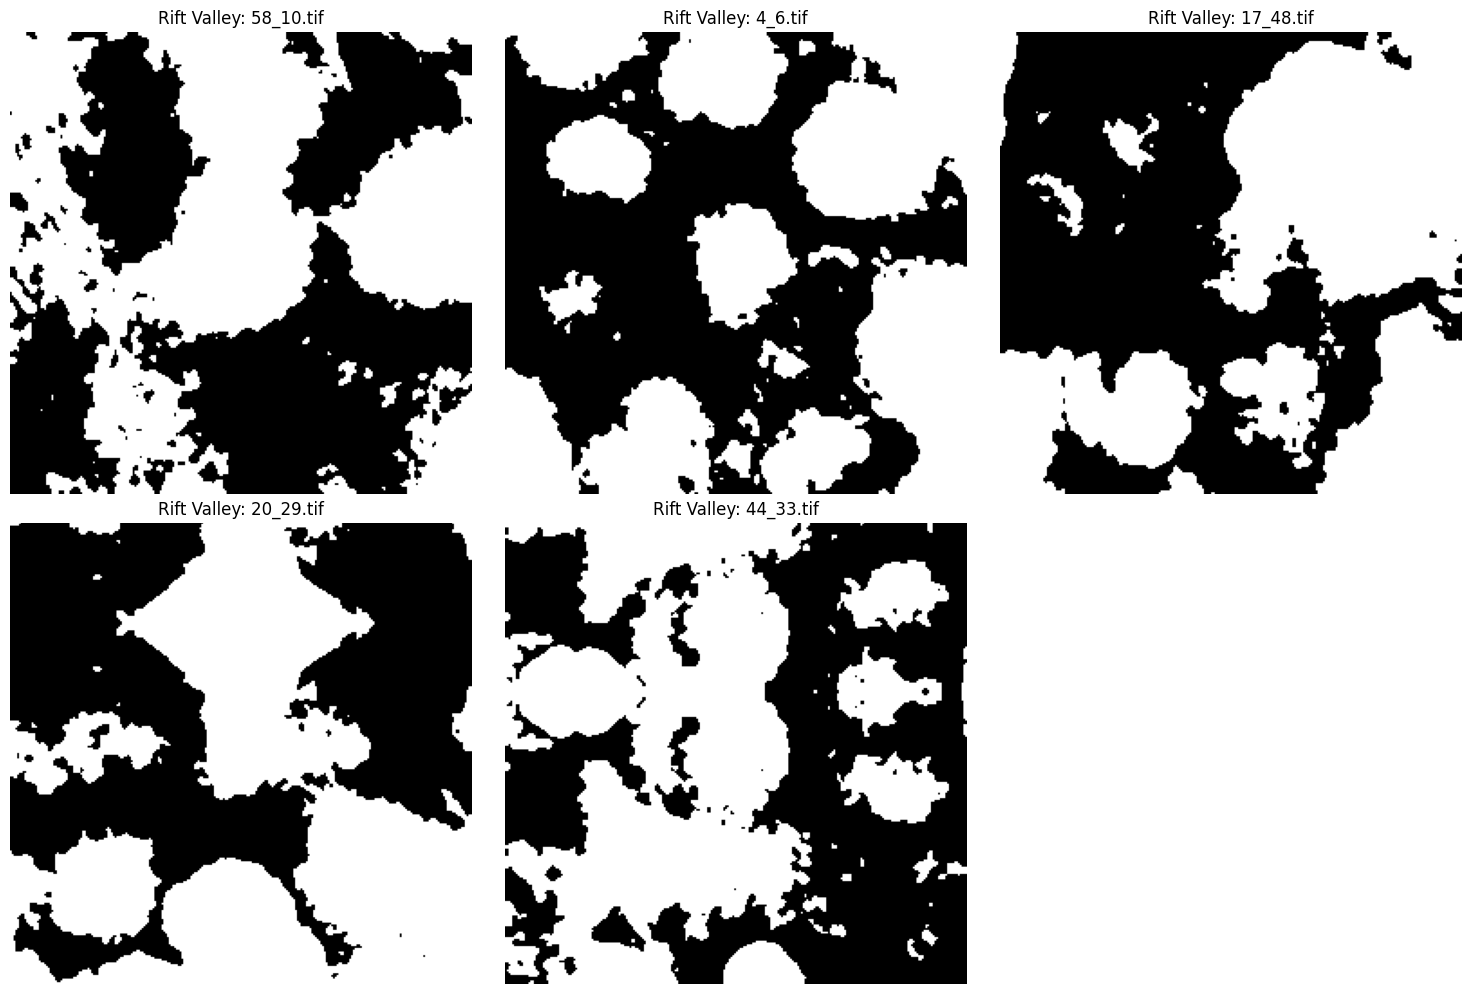

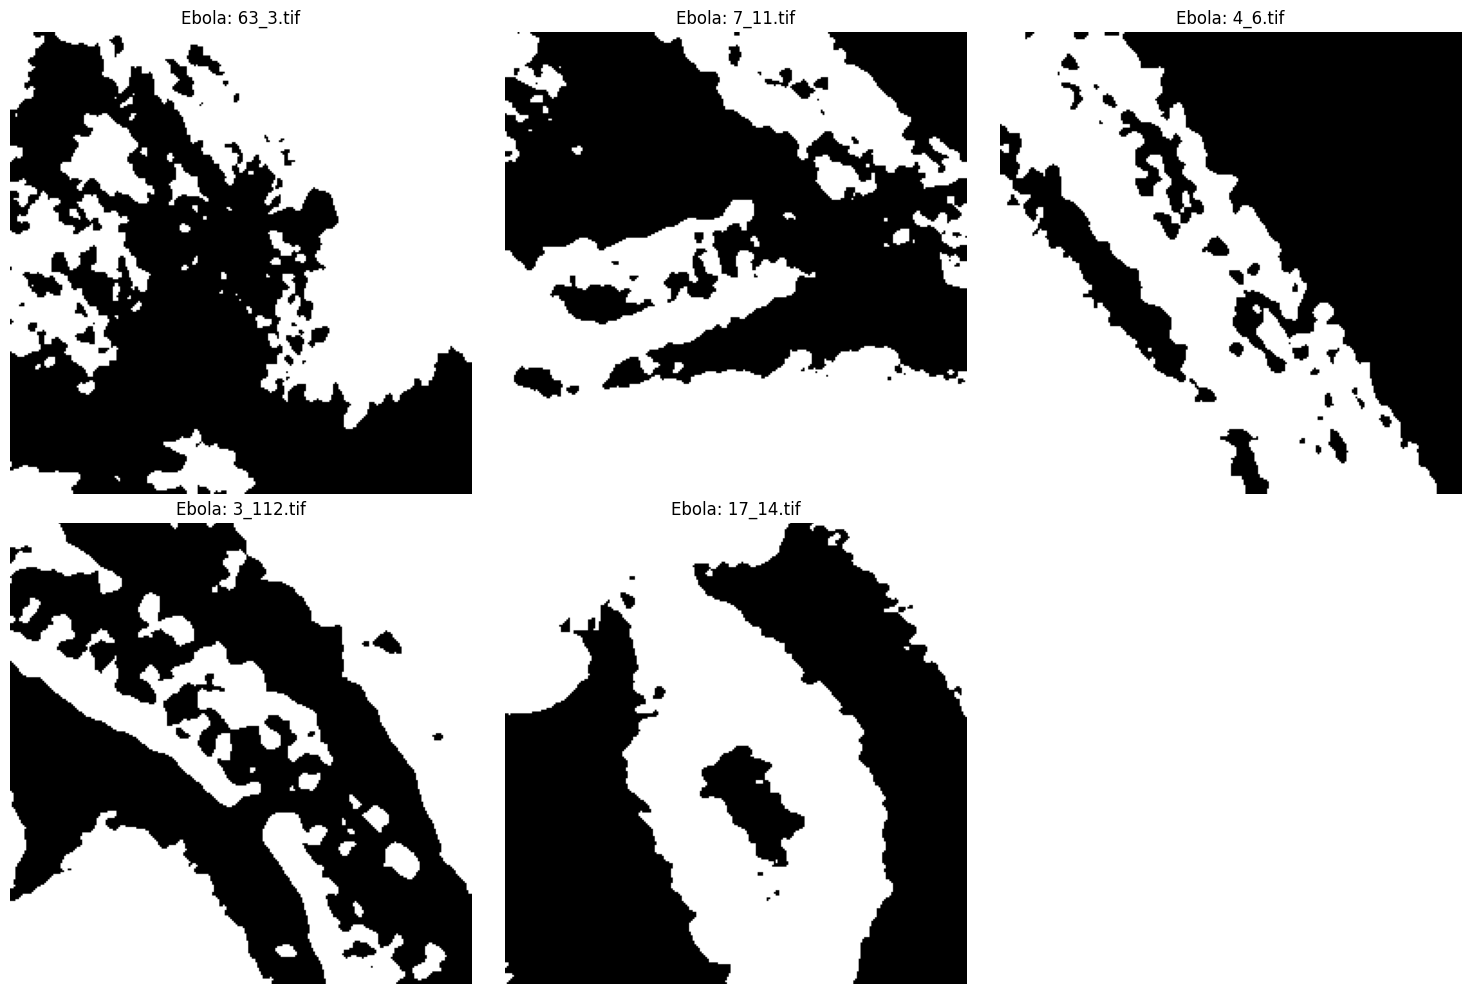

Image display completed.


In [ ]:
output_dir = '/content/proces/train'

class_names = [
    "Rotavirus", "Papilloma", "Influenza", "Adenovirus", "Lassa",
    "Orf", "CCHF", "Astrovirus", "Cowpox", "Norovirus",
    "Nipah virus", "Marburg", "Rift Valley", "Ebola"]

def display_images(class_name):
    class_output_dir = os.path.join(output_dir, class_name)
    images = os.listdir(class_output_dir)[:5]

    plt.figure(figsize=(15, 10))
    for i, img_name in enumerate(images):
        img_path = os.path.join(class_output_dir, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        plt.subplot(2, 3, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f"{class_name}: {img_name}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

for class_name in class_names:
    display_images(class_name)

print("Image display completed.")


<font color='#EADCA0'><h2>Directory Setup for Image Data</h2></font>


In [ ]:
train_dir = "/content/process/train"
test_dir = "/content/process/test"
val_dir = "/content/process/val"

<font color='#EADCA0'><h2>Image Data Generators:</h2></font>
###### <font color='#E1CD76'>
used to preprocess and augment the image data
</font>

In [ ]:
train_gen = ImageDataGenerator( rescale= 1. / 255)
test_gen = ImageDataGenerator(rescale = 1. / 255)
val_gen = ImageDataGenerator(rescale = 1. / 255)

<font color='#EADCA0'><h2>Data Generators for Training, Testing, and Validation</h2></font>


In [ ]:
train_generator = train_gen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size = 128,
    class_mode='categorical'
)

Found 12950 images belonging to 14 classes.


In [ ]:
test_generator = test_gen.flow_from_directory(
    test_dir,
    target_size = (224,224),
    batch_size = 128,
    class_mode = 'categorical'  )

Found 1629 images belonging to 14 classes.


In [ ]:
val_generator = val_gen.flow_from_directory(
    val_dir,
    target_size = (224,224),
    batch_size = 128,
    class_mode = 'categorical'
)

Found 1614 images belonging to 14 classes.


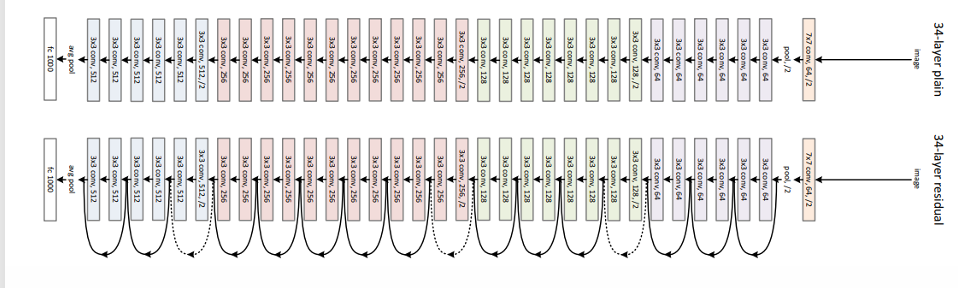
<font color='#EADCA0'><h2>ResNet-50 Model Implementation and Training</h2></font>

###### <font color='#E1CD76'>
1. **Model Architecture**:
   - The ResNet-50 architecture is implemented using residual blocks with three convolutional layers each.<br>
   - <font color='#B8DFF5'>**Shortcut connections**</font> are included to preserve gradient flow during backpropagation.<br>
   - The final layers include <font color='#C3F7A4'>**global average pooling**</font>, dropout, and a dense softmax layer for classification.<br>

2. **Regularization**:
   - <font color='#C3F7A4'>**L2 regularization**</font> is applied to convolutional layers to prevent overfitting.<br>
   - A dropout layer (rate = <font color='#F5D0A9'>0.4</font>) is added after the global average pooling layer for further regularization.<br>

3. **Training Setup**:
   - The model is compiled with the <font color='#F9BABA'>Adam optimizer</font> and a learning rate of <font color='#F9E79F'>1e-4</font> for fine-tuning.<br>
   - <font color='#FFCF86'>**categorical_crossentropy**</font> is used as the loss function, suitable for multi-class classification.<br>
   - Class weights are computed to handle class imbalance effectively.<br>

In [ ]:
def residual_block(X: tf.Tensor, filters: List[int], stride: int = 1, downsample: bool = False) -> tf.Tensor:

    f1, f2, f3 = filters
    X_shortcut = X

    X = layers.Conv2D(filters=f1, kernel_size=1, strides=stride, padding='valid',
                      kernel_initializer=glorot_uniform(seed=0),
                      kernel_regularizer=regularizers.l2(1e-4))(X)
    X = layers.BatchNormalization(axis=3)(X)
    X = layers.ReLU()(X)

    X = layers.Conv2D(filters=f2, kernel_size=3, strides=1, padding='same',
                      kernel_initializer=glorot_uniform(seed=0),
                      kernel_regularizer=regularizers.l2(1e-4))(X)
    X = layers.BatchNormalization(axis=3)(X)
    X = layers.ReLU()(X)

    X = layers.Conv2D(filters=f3, kernel_size=1, strides=1, padding='valid',
                      kernel_initializer=glorot_uniform(seed=0),
                      kernel_regularizer=regularizers.l2(1e-4))(X)
    X = layers.BatchNormalization(axis=3)(X)

    if downsample:
        X_shortcut = layers.Conv2D(filters=f3, kernel_size=1, strides=stride, padding='valid',
                                   kernel_initializer=glorot_uniform(seed=0),
                                   kernel_regularizer=regularizers.l2(1e-4))(X_shortcut)
        X_shortcut = layers.BatchNormalization(axis=3)(X_shortcut)

    X = layers.Add()([X, X_shortcut])
    X = layers.ReLU()(X)

    return X

In [ ]:
def build_resnet50(input_shape, num_classes):

    input_layer = layers.Input(shape=input_shape)

    x = layers.Conv2D(64, (7, 7), strides=2, padding='same',
                      kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(1e-4))(input_layer)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling2D((3, 3), strides=2, padding='same')(x)

    stages = [
        ([64, 64, 256], 3),
        ([128, 128, 512], 4),
        ([256, 256, 1024], 6),
        ([512, 512, 2048], 3)
    ]

    for filters, num_blocks in stages:
        for i in range(num_blocks):
            downsample = (i == 0)
            x = residual_block(x, filters, stride=2 if downsample else 1, downsample=downsample)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.4)(x)
    output_layer = layers.Dense(num_classes, activation='softmax',
                                kernel_initializer='he_normal')(x)

    model = models.Model(inputs=input_layer, outputs=output_layer)
    return model


input_shape = (224, 224, 3)
num_classes = 14

model = build_resnet50(input_shape, num_classes)


In [ ]:
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 112, 112, 64)   │          9,472 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 112, 112, 64)   │            256 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu (ReLU)              │ (None, 112, 112, 64)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 56, 56, 64)     │              0 │ re_lu[0][0]            │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 28, 28, 64)     │          4,160 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 28, 28, 64)     │            256 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_1 (ReLU)            │ (None, 28, 28, 64)     │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 28, 28, 64)     │         36,928 │ re_lu_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 28, 28, 64)     │            256 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_2 (ReLU)            │ (None, 28, 28, 64)     │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 28, 28, 256)    │         16,640 │ re_lu_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 28, 28, 256)    │         16,640 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 28, 28, 256)    │          1,024 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 28, 28, 256)    │          1,024 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 28, 28, 256)    │              0 │ batch_normalization_3… │
│                           │                        │                │ batch_normalization_4… │
├──────────────────────

 Total params: 23,616,398 (90.09 MB)

 Trainable params: 23,563,278 (89.89 MB)

 Non-trainable params: 53,120 (207.50 KB)

###### <font color='#E1CD76'>

4. **Callbacks**:
   - **ModelCheckpoint**:
     - Saves both the best full model and its weights based on validation loss.<br>
   - **EarlyStopping**:
     - Monitors validation loss and stops training after <font color='#F5A9A9'>15 epochs</font> of no improvement.<br>

5. **Evaluation**:
   - The model's performance is evaluated on training, validation, and test datasets.<br>
   - Metrics such as <font color='#A9F5D0'>accuracy</font> and <font color='#A9D0F5'>loss</font> are calculated and printed for each dataset.<br>

6. **Learning Curve Visualization**:
   - Training and validation <font color='#C3F7A4'>**accuracy**</font> and <font color='#B8DFF5'>**loss**</font> are plotted for each epoch.<br>
   - Scatter points highlight specific epoch metrics for better readability.<br>
   - The plots include gridlines and legends for clarity.<br>
   
</font>

In [ ]:
class_indices = train_generator.class_indices
class_labels = list(class_indices.keys())

train_labels = train_generator.classes

class_weights = compute_class_weight('balanced', classes=np.unique(train_labels), y=train_labels)
class_weights_dict = dict(enumerate(class_weights))

print("Class Labels:", class_labels)
print("Class Weights:", class_weights_dict)


checkpoint_full_model = ModelCheckpoint(
    filepath='Resnet50.keras',
    save_best_only=True,
    monitor='val_loss',
    mode='min',
    verbose=1
)

checkpoint_weights_only = ModelCheckpoint(
    filepath='Resnet50.weights.h5',
    save_weights_only=True,
    save_best_only=True,
    monitor='val_loss',
    mode='min',
    verbose=1
)

early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1)



Class Labels: ['Adenovirus', 'Astrovirus', 'CCHF', 'Cowpox', 'Ebola', 'Influenza', 'Lassa', 'Marburg', 'Nipah virus', 'Norovirus', 'Orf', 'Papilloma', 'Rift Valley', 'Rotavirus']
Class Weights: {0: 1.2028608582574774, 1: 1.0668973471741638, 2: 1.085680751173709, 3: 1.2107329842931938, 4: 0.847846012832264, 5: 0.8200354609929078, 6: 0.9935553168635876, 7: 0.8604651162790697, 8: 1.2847222222222223, 9: 1.0607798165137614, 10: 1.3101983002832862, 11: 0.7695507487520798, 12: 0.7619439868204283, 13: 1.2187088274044795}


In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    callbacks=[checkpoint_full_model, checkpoint_weights_only, early_stopping],
    class_weight= class_weights_dict
    )

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 672ms/step - accuracy: 0.1621 - loss: 5.0576
Epoch 1: val_loss improved from inf to 5.25891, saving model to Resnet50.keras

Epoch 1: val_loss improved from inf to 5.25891, saving model to Resnet50.weights.h5
102/102 ━━━━━━━━━━━━━━━━━━━━ 162s 859ms/step - accuracy: 0.1627 - loss: 5.0524 - val_accuracy: 0.0589 - val_loss: 5.2589
Epoch 2/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step - accuracy: 0.4300 - loss: 3.5962
Epoch 2: val_loss did not improve from 5.25891

Epoch 2: val_loss did not improve from 5.25891
102/102 ━━━━━━━━━━━━━━━━━━━━ 60s 434ms/step - accuracy: 0.4305 - loss: 3.5949 - val_accuracy: 0.0774 - val_loss: 6.8313
Epoch 3/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step - accuracy: 0.6248 - loss: 3.0125
Epoch 3: val_loss did not improve from 5.25891

Epoch 3: val_loss did not improve from 5.25891
102/102 ━━━━━━━━━━━━━━━━━━━━ 46s 430ms/step - accuracy: 0.6250 - loss: 3.0118 - val_accuracy: 0.0737 - val_loss: 10.1770
Epoch 4/50
102/102 ━━━━━━━━━━━━

<font color='#EADCA0'><h2>Model Evaluation</h2></font>
###### <font color='#E1CD76'>
1. **Evaluation Metrics**:
   - The model is evaluated on the training, testing, and validation datasets using `model.evaluate` to calculate loss and accuracy.<br>
   - Results are rounded and displayed for easier interpretation:<br>
      - Train Loss and Accuracy<br>
      - Test Loss and Accuracy<br>
      - Validation Loss and Accuracy<br>
      
</font>

In [ ]:
train_result = model.evaluate(train_generator)
test_result = model.evaluate(test_generator)
val_result = model.evaluate (val_generator)

102/102 ━━━━━━━━━━━━━━━━━━━━ 33s 324ms/step - accuracy: 0.9985 - loss: 1.5149
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 821ms/step - accuracy: 0.8995 - loss: 1.9718
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 266ms/step - accuracy: 0.9105 - loss: 1.9837


In [ ]:
print('Train loss:', (np.round(train_result[0], 4)))
print('Test loss:', (np.round(test_result[0], 4)))
print('Val loss:', (np.round(val_result[0], 4)))

print('Train accuracy:', (np.round(train_result[1], 4) * 100) , '%')
print('Test accuracy:', (np.round(test_result[1], 4) * 100) , '%')
print('Val accuracy:', (np.round(val_result[1], 4) * 100) , '%')


Train loss: 1.5145
Test loss: 1.9655
Val loss: 1.9423
Train accuracy: 99.82 %
Test accuracy: 90.18 %
Val accuracy: 91.2 %


<font color='#EADCA0'><h2>Learning Curve Visualization</h2></font>
###### <font color='#E1CD76'>
1. **Accuracy and Loss**:
   - Training and validation accuracy/loss metrics are extracted from the training history.<br>
   - Plots display trends over epochs to visualize model performance.<br>
   - Each point on the graph represents accuracy/loss for training and validation, providing insights into overfitting or underfitting.<br>
</font>

In [ ]:
def plot_learning_curve(history, metrics):
    acc = history.history[metrics]
    val_acc = history.history[f'val_{metrics}']
    epochs = range(len(acc))

    plt.figure(figsize=(8,5))
    plt.plot(epochs, acc, label=f'training_{metrics}')
    plt.plot(epochs, val_acc, label=f'val_{metrics}')
    plt.scatter(epochs, acc, color='blue')
    plt.scatter(epochs, val_acc, color='blue')
    plt.grid(True, color='gray')
    plt.legend()
    plt.show()

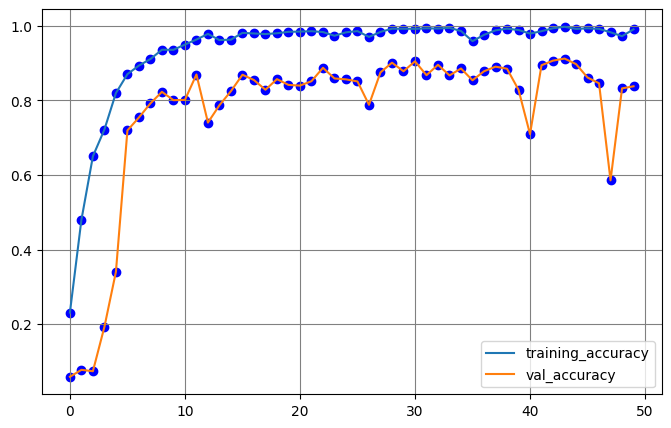

In [ ]:
plot_learning_curve(history=history, metrics='accuracy')

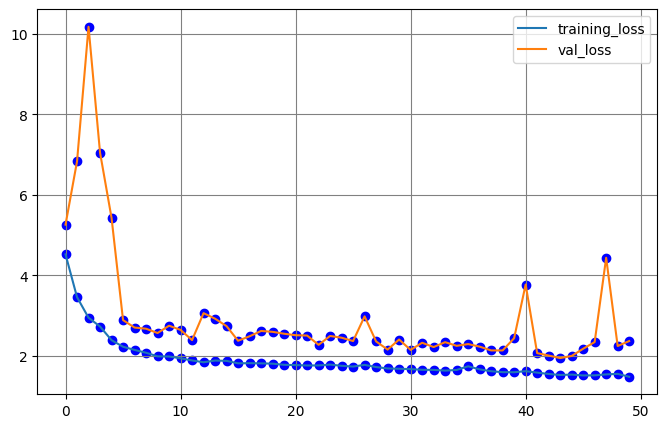

In [ ]:
plot_learning_curve(history=history, metrics='loss')

<font color='#EADCA0'><h2>Classification Report and Confusion Matrix</h2></font>
###### <font color='#E1CD76'>
1. **Batch-wise Evaluation**:
   - The test generator is iterated batch by batch to obtain predictions and true labels.<br>
   - Predictions are compared to ground truth to generate classification reports and confusion matrices for each batch (optional).<br>
2. **Overall Metrics**:
   - Predictions and labels from all batches are concatenated.<br>
   - Overall classification report and confusion matrix are computed:<br>
      - **Classification Report**: Displays precision, recall, F1-score, and support for each class.<br>
      - **Confusion Matrix**: Shows counts of true positive, true negative, false positive, and false negative predictions.<br>
3. **Confusion Matrix Visualization**:
   - Heatmap representation of the confusion matrix using `seaborn` for intuitive insights.<br>
   - True labels and predicted labels are annotated for better understanding.<br>
   
</font>

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Overall Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.90      0.94        99
           1       0.95      0.90      0.93       110
           2       0.80      0.94      0.87       100
           3       0.92      0.94      0.93        96
           4       0.83      0.94      0.88       145
           5       0.95      0.91      0.93       141
           6       0.86      0.82      0.84       115
           7       0.90      0.85      0.8

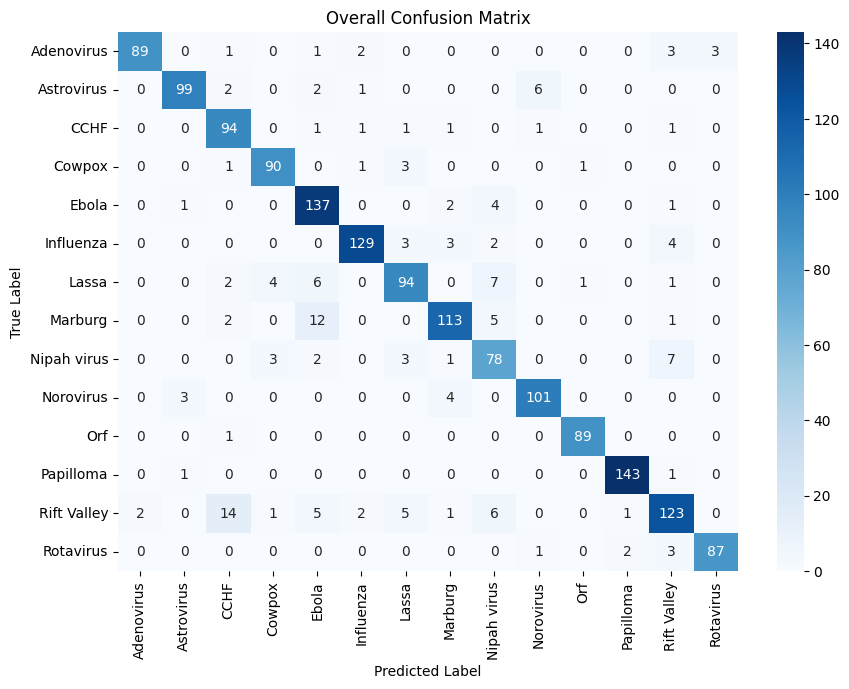

In [ ]:
test_predicts = []
test_targets = []

for batch_index, (x_test, y_test) in enumerate(test_generator):
    if batch_index >= len(test_generator):
        break

    test_predict = model.predict(x_test)

    batch_predicts = test_predict.argmax(axis=1)
    batch_targets = y_test.argmax(axis=1)

    test_predicts.append(batch_predicts)
    test_targets.append(batch_targets)

test_predicts = np.concatenate(test_predicts)
test_targets = np.concatenate(test_targets)

print("Overall Classification Report:")
print(classification_report(test_targets, test_predicts))

overall_cm = confusion_matrix(test_targets, test_predicts)
print("Overall Confusion Matrix:")
print(overall_cm)

class_names = list(test_generator.class_indices.keys())
plt.figure(figsize=(10, 7))
sns.heatmap(overall_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Overall Confusion Matrix')
plt.show()


<font color='#EADCA0'><h2>ROC Curve and AUC for Multi-Class Classification</h2></font>
###### <font color='#E1CD76'>
1. **ROC Curve**:
   - True labels are binarized (one-hot encoded) for multi-class ROC computation.<br>
   - Predicted probabilities are used to compute false positive rates (FPR) and true positive rates (TPR) for each class.<br>
2. **AUC**:
   - Area Under Curve (AUC) is calculated for each class.<br>
   - ROC curves and their corresponding AUC scores are plotted for individual classes.<br>
   - A diagonal line (random guess) is included for reference.<br>
3. **Visualization**:
   - The ROC curve is plotted with proper labeling and grid customization.<br>
   
</font>

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


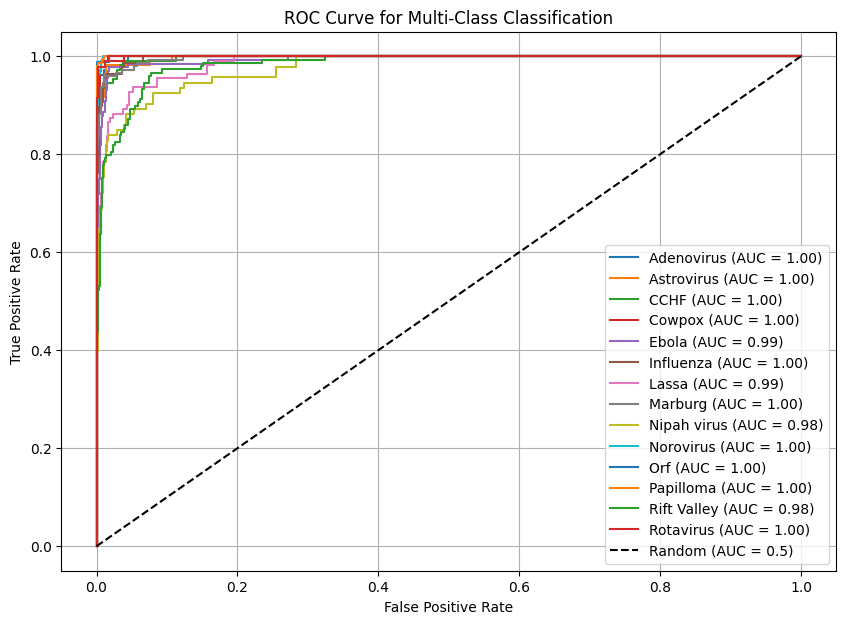

In [ ]:
test_predicts_proba = []
test_targets = []

for batch_index, (x_test, y_test) in enumerate(test_generator):
    if batch_index >= len(test_generator):
        break

    test_predict_proba = model.predict(x_test)

    batch_targets = y_test

    test_predicts_proba.append(test_predict_proba)
    test_targets.append(batch_targets)

test_predicts_proba = np.concatenate(test_predicts_proba)
test_targets = np.concatenate(test_targets)

lb = LabelBinarizer()
test_targets_binarized = lb.fit_transform(test_targets)

plt.figure(figsize=(10, 7))

class_names = list(test_generator.class_indices.keys())

for i in range(len(class_names)):
    fpr, tpr, _ = roc_curve(test_targets_binarized[:, i], test_predicts_proba[:, i])
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{class_names[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5)')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
